**Features (Independent Variables):**
- Dates
- Fature_1_Target_1
- Fature_2_Target_1
- Fature_3_Target_1
- Common_Feature_1
- Common_Feature_2
- Common_Feature_3
- Common_Feature_4

**Targets (dependent Variables):**
- Rangpur-28


### Libraries

In [1]:
# Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from scipy import stats
from tbats import TBATS
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from keras.models import Sequential
from skopt.space import Integer, Real
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from keras.layers import LSTM, GRU, Dense
from sklearn.pipeline import make_pipeline
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression, Ridge
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.gaussian_process import GaussianProcessRegressor
from statsmodels.nonparametric.kernel_regression import KernelReg
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

### Loading dataset...

In [2]:
df = pd.read_excel(r'D:\Jupyter\Ground water level prediction(Towfiq Sir)\GWP\final__Rangpur_28.xlsx')
df

,Date,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value,Rangpur-28
0,01.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.956000
1,02.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.956000
2,03.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.956000
3,04.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.956000
4,05.01.1993,15.1,49,0.1763,-0.025962,-8.2,0.28,0.925,2.956000
...,...,...,...,...,...,...,...,...,...
9126,27.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,2.003333
9127,28.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,2.003333
9128,29.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,2.003333
9129,30.12.2017,22.6,0,0.1372,-0.204937,-1.4,-0.85,-0.404,2.003333


In [3]:
print(df.columns)

Index(['Date', 'Rangpur_Tave', 'Rangpur_PRCP', 'Rangpur_NDVI', 'IOD_Value',
       'SOI_Value', 'Nina3.4_Value', 'MEI_Value', 'Rangpur-28'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9131 non-null   object 
 1   Rangpur_Tave   9131 non-null   float64
 2   Rangpur_PRCP   9131 non-null   int64  
 3   Rangpur_NDVI   9131 non-null   float64
 4   IOD_Value      9131 non-null   float64
 5   SOI_Value      9131 non-null   float64
 6   Nina3.4_Value  9131 non-null   float64
 7   MEI_Value      9131 non-null   float64
 8   Rangpur-28     9131 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 642.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,9131.0,26.391261,16.968462,13.90000,22.300000,26.900000,28.700000,306.000000
Rangpur_PRCP,9131.0,185.486475,207.335981,0.00000,4.000000,110.000000,333.000000,913.000000
Rangpur_NDVI,9131.0,0.196554,0.073335,0.04500,0.139700,0.180400,0.251400,0.412000
IOD_Value,9131.0,0.004448,0.344990,-0.88667,-0.203742,-0.023450,0.207985,1.472656
SOI_Value,9131.0,-0.491052,10.714015,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4_Value,9131.0,0.007095,0.870827,-1.79000,-0.560000,-0.080000,0.480000,2.570000
MEI_Value,9131.0,-0.005756,1.035444,-1.96400,-0.771000,-0.225000,0.612500,3.214000
Rangpur-28,9131.0,3.022881,0.774038,1.51750,2.437500,3.036667,3.576000,6.060000


In [6]:
df["Rangpur-28"].describe()

count    9131.000000
mean        3.022881
std         0.774038
min         1.517500
25%         2.437500
50%         3.036667
75%         3.576000
max         6.060000
Name: Rangpur-28, dtype: float64

In [7]:
cols_to_convert = df.columns.difference(['Date'])
df[cols_to_convert] = df[cols_to_convert].astype(float)

# 2. Data Exploration and Analysis
## Visualizing the distribution


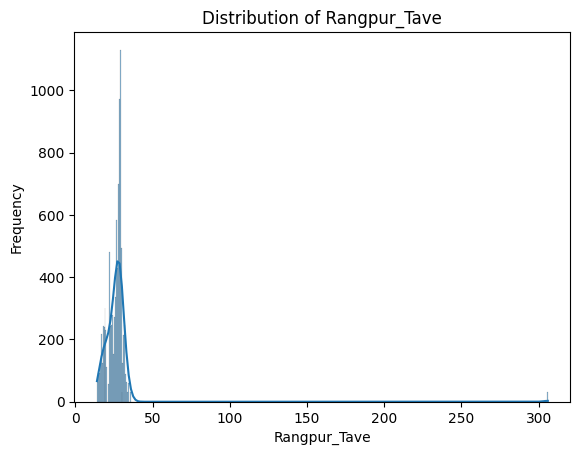

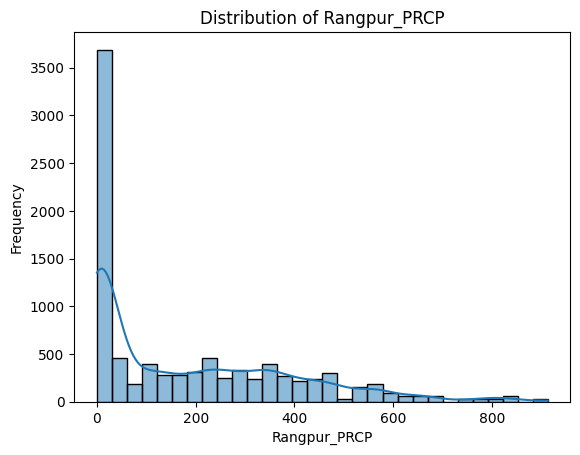

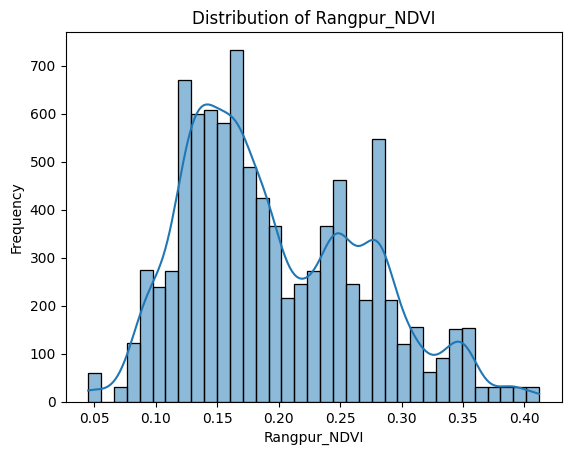

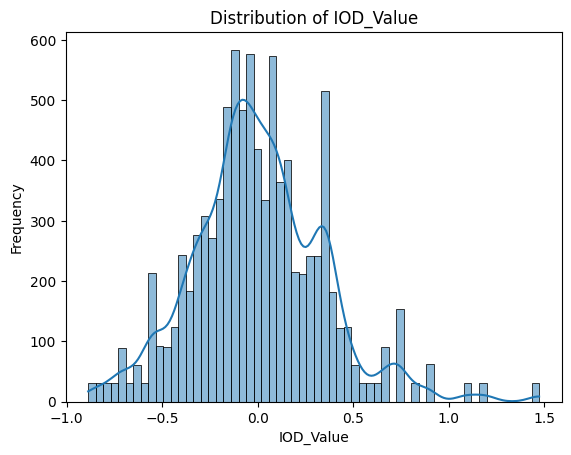

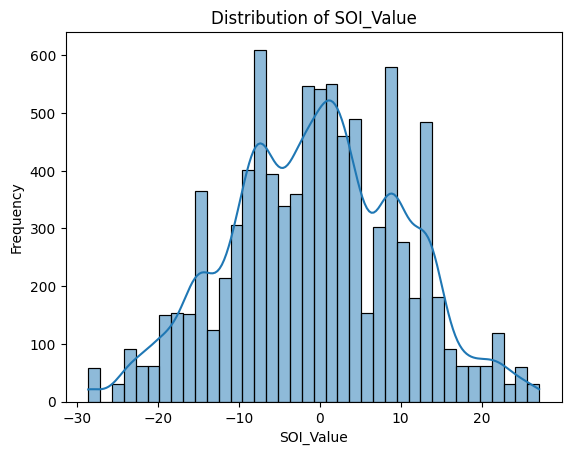

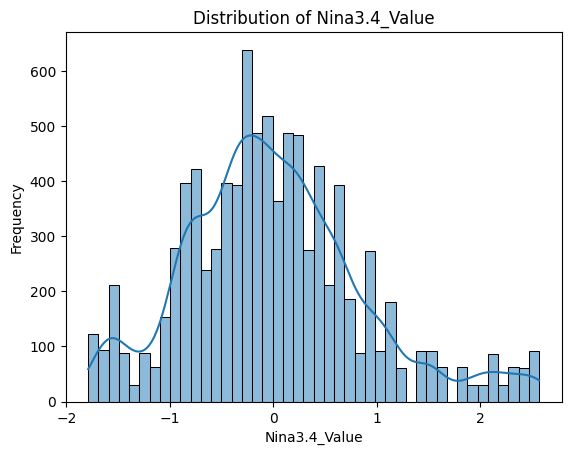

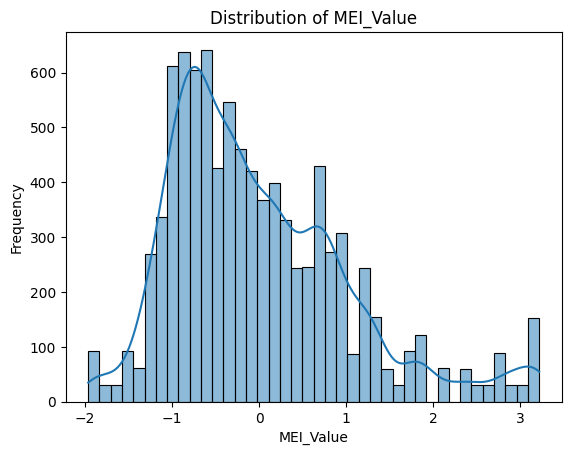

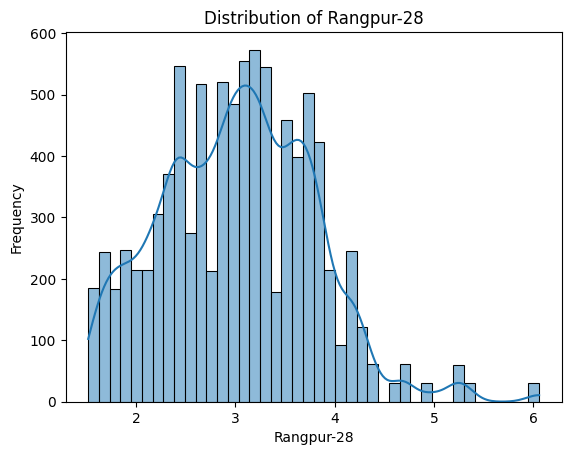

In [8]:
def plot_distribution(df, columns):
    for column in columns:
        if column != 'Date':  
            sns.histplot(df[column], kde=True)
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)  
            plt.ylabel("Frequency")  
            plt.show()


numerical_cols = df.columns[1:]  

plot_distribution(df, numerical_cols)

## Data Cleaning,Checking errors, Missing values

In [9]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [10]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [11]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [12]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

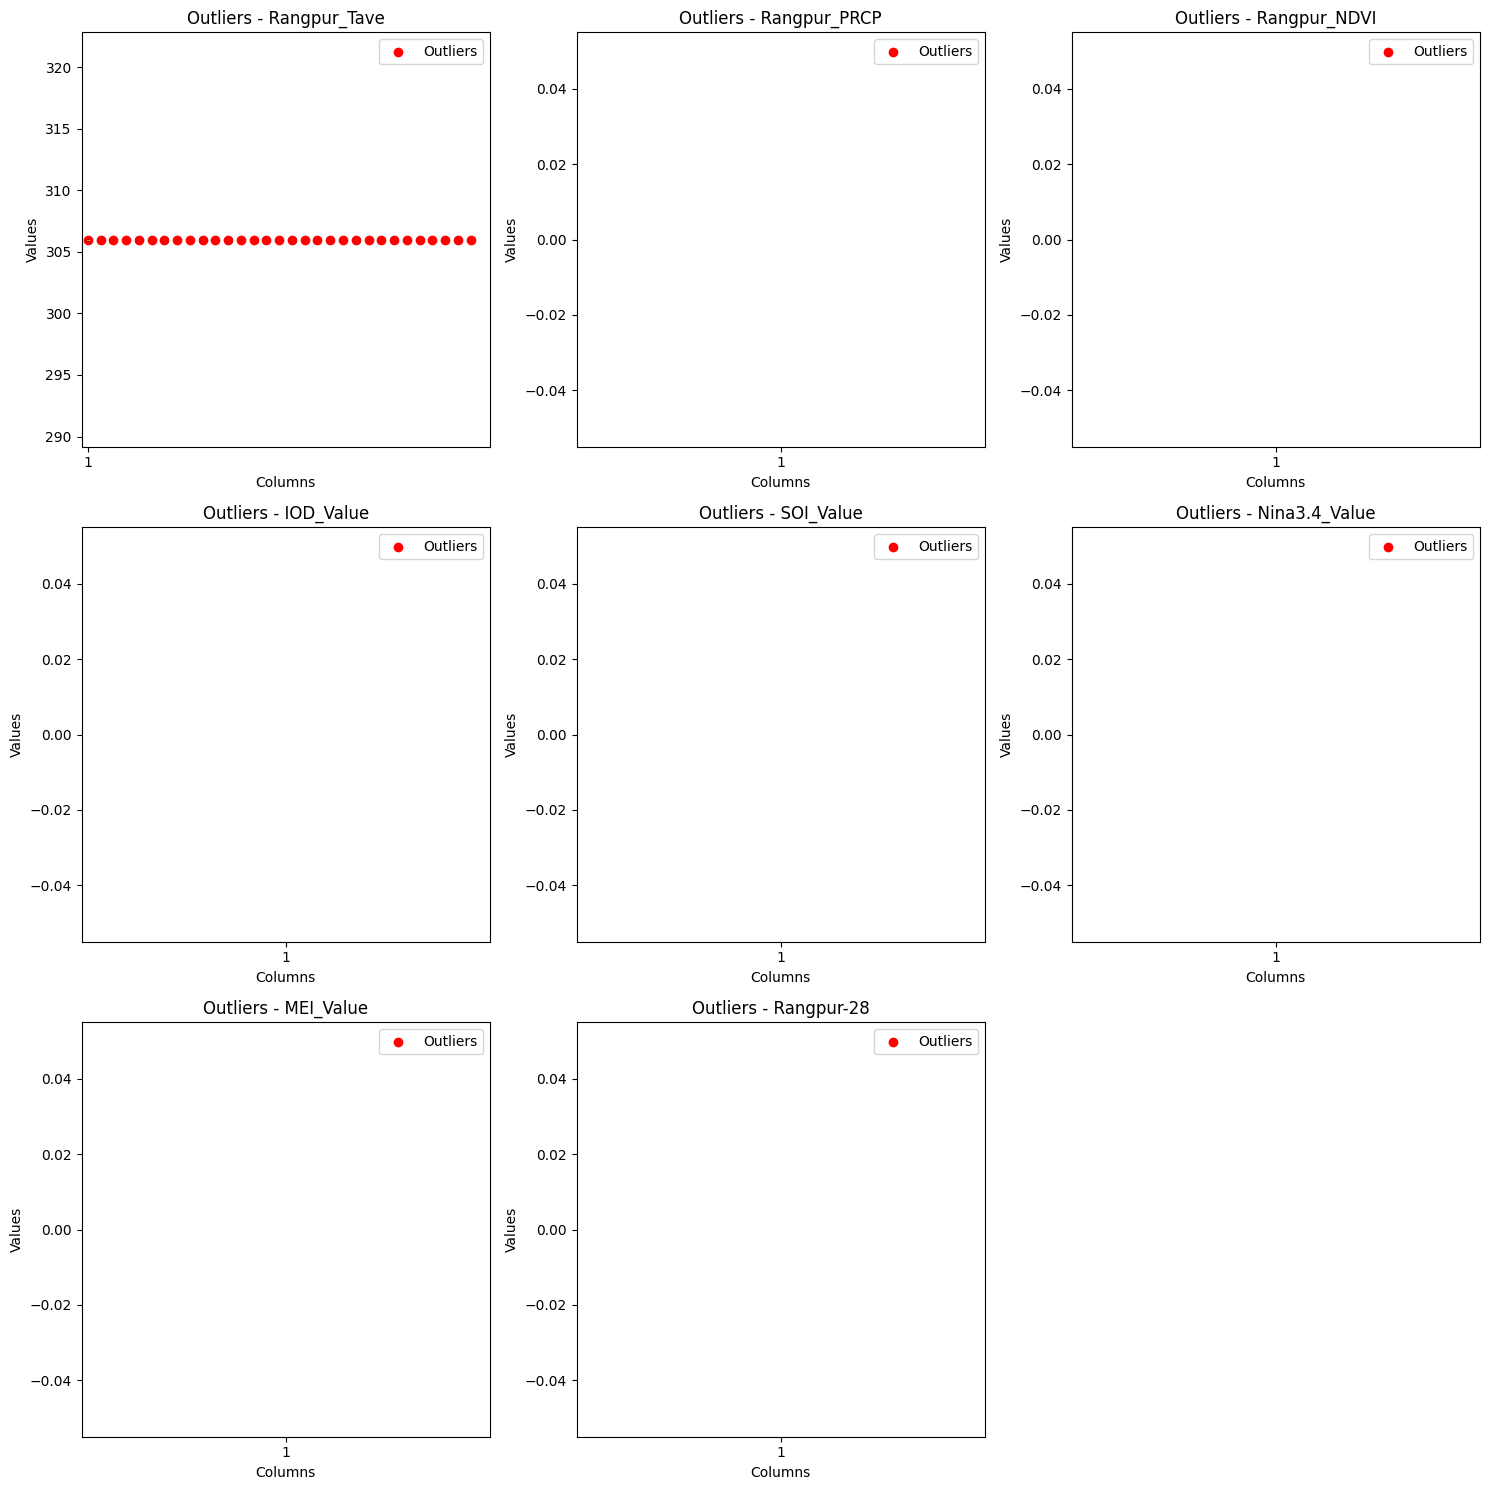

Number of total outliers: 1036


In [13]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

## Data Splitting for Machine Learning

In [14]:
X = df.drop(columns=['Rangpur-28', 'Date'])
y = df['Rangpur-28']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Split viz

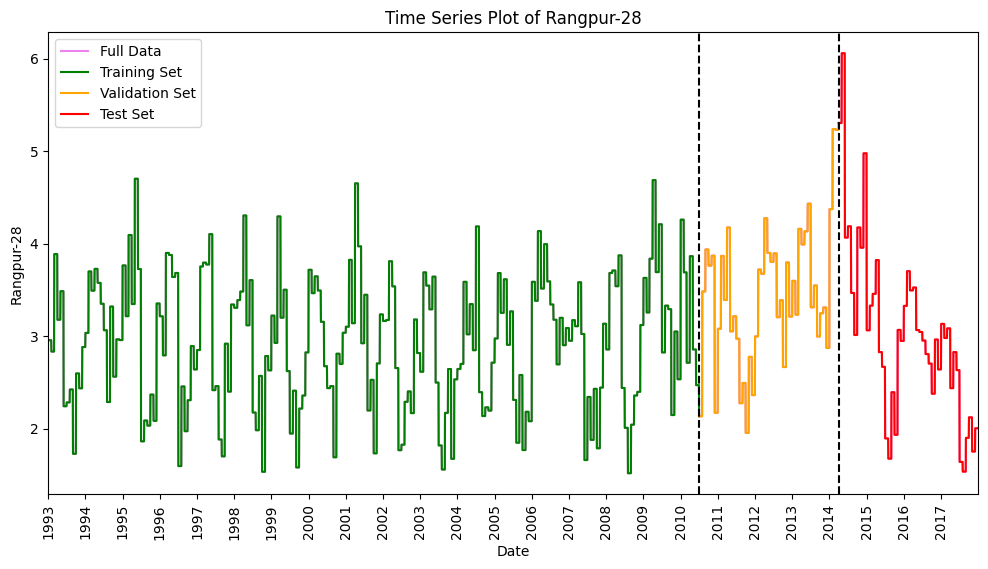

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create a time series plot
plt.figure(figsize=(12, 6))

# Plot the entire dataset
plt.plot(df['Date'], df['Rangpur-28'], color='violet', label='Full Data')

# Plot training data
plt.plot(df['Date'][:len(X_train)], df['Rangpur-28'][:len(X_train)], color='green', label='Training Set')

# Plot validation data
plt.plot(df['Date'][len(X_train):len(X_train) + len(X_val)], df['Rangpur-28'][len(X_train):len(X_train) + len(X_val)], color='orange', label='Validation Set')

# Plot test data
plt.plot(df['Date'][len(X_train) + len(X_val):], df['Rangpur-28'][len(X_train) + len(X_val):], color='red', label='Test Set')

# Add vertical lines
plt.axvline(df['Date'][len(X_train)], color='black', linestyle='--')
plt.axvline(df['Date'][len(X_train) + len(X_val)], color='black', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Rangpur-28')
plt.title('Time Series Plot of Rangpur-28')
plt.grid(True, linestyle='--', alpha=0.6)

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data from the first date to the last date
plt.xlim(df['Date'].min(), df['Date'].max())
plt.xticks(rotation=90) 
plt.grid(False)
plt.legend()
plt.show()

In [16]:
X

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
0,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925
1,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925
2,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925
3,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925
4,15.1,49.0,0.1763,-0.025962,-8.2,0.28,0.925
...,...,...,...,...,...,...,...
9126,22.6,0.0,0.1372,-0.204937,-1.4,-0.85,-0.404
9127,22.6,0.0,0.1372,-0.204937,-1.4,-0.85,-0.404
9128,22.6,0.0,0.1372,-0.204937,-1.4,-0.85,-0.404
9129,22.6,0.0,0.1372,-0.204937,-1.4,-0.85,-0.404


In [17]:
y

0       2.956000
1       2.956000
2       2.956000
3       2.956000
4       2.956000
          ...   
9126    2.003333
9127    2.003333
9128    2.003333
9129    2.003333
9130    2.003333
Name: Rangpur-28, Length: 9131, dtype: float64

In [18]:
X_train

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
3063,27.2,235.0,0.2155,-0.157832,-9.0,-0.30,-0.322
1940,25.8,173.0,0.1464,-0.131525,-24.4,0.90,2.821
6848,27.5,6.0,0.1294,0.348779,7.3,-0.93,-0.071
3509,28.9,287.0,0.1551,-0.293105,-14.6,0.70,0.636
1612,28.2,276.0,0.1607,0.010510,-24.1,1.15,2.602
...,...,...,...,...,...,...,...
5734,28.4,227.0,0.1837,0.050483,13.5,-0.28,-0.318
5191,23.0,16.0,0.2755,0.147723,-1.4,-0.15,-0.864
5390,26.7,138.0,0.1418,0.130834,5.4,-1.40,-0.669
860,29.2,158.0,0.2843,-0.039353,-9.0,0.03,0.940


In [19]:
X_temp

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
4043,15.9,9.0,0.1564,-0.116838,-11.6,0.26,0.526
3573,26.4,99.0,0.3435,0.626101,-7.4,1.16,1.090
4505,26.4,271.0,0.1465,0.196267,-14.5,0.30,0.588
5381,28.2,277.0,0.1440,0.380060,1.4,-1.04,-0.800
2881,22.5,0.0,0.0936,-0.029802,22.4,-0.75,-0.397
...,...,...,...,...,...,...,...
1489,16.0,19.0,0.1678,-0.058970,4.1,-0.43,-0.453
812,23.2,4.0,0.2423,0.107568,3.5,0.49,0.935
1882,19.5,12.0,0.1092,0.134668,-19.2,2.08,2.823
4974,29.7,96.0,0.1005,0.164956,-15.9,0.37,-0.474


In [20]:
 y_train

3063    3.971667
1940    4.305000
6848    1.954000
3509    2.290000
1612    2.416000
          ...   
5734    2.042500
5191    3.107500
5390    1.787500
860     4.702500
7270    3.796667
Name: Rangpur-28, Length: 6391, dtype: float64

In [21]:
y_temp


4043    2.6450
3573    2.1675
4505    2.9060
5381    2.4300
2881    2.7000
         ...  
1489    2.8500
812     4.0940
1882    3.3900
4974    3.1775
4039    2.6450
Name: Rangpur-28, Length: 2740, dtype: float64

In [22]:
X_val

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
7609,22.1,0.0,0.1447,-0.067228,9.2,-0.02,-0.911
4084,25.2,39.0,0.1563,-0.109683,0.2,-0.10,0.118
7920,31.9,599.0,0.1285,-0.465427,-7.6,0.37,-0.523
8327,31.6,3.0,0.3282,0.403764,-20.2,2.21,-0.228
2716,28.7,438.0,0.1942,-0.067885,-5.5,-0.75,-0.711
...,...,...,...,...,...,...,...
5762,26.2,175.0,0.2448,0.102282,13.4,-0.30,-0.012
3254,23.3,7.0,0.1265,-0.082291,7.2,-0.28,-0.290
4541,28.8,428.0,0.1633,0.016435,2.6,0.22,0.737
350,19.0,0.0,0.1228,-0.157270,1.6,0.19,0.784


In [23]:
X_test

,Rangpur_Tave,Rangpur_PRCP,Rangpur_NDVI,IOD_Value,SOI_Value,Nina3.4_Value,MEI_Value
4710,22.2,0.0,0.1304,-0.361621,-2.0,-0.44,-0.998
131,26.4,190.0,0.1219,0.312997,-8.2,0.93,1.860
2802,27.5,172.0,0.1178,0.012307,9.9,-0.39,-0.113
4472,24.0,61.0,0.1041,-0.561639,0.2,0.28,0.631
1108,16.4,13.0,0.2777,0.337663,8.4,-0.65,-0.437
...,...,...,...,...,...,...,...
2948,15.7,0.0,0.1224,0.152971,8.4,-0.88,-0.706
6394,29.4,346.0,0.2514,-0.197084,20.5,-0.89,-1.964
1746,25.4,16.0,0.1976,1.088737,-17.8,2.29,3.214
5820,19.5,0.0,0.3542,-0.102193,13.3,-0.90,-0.540


In [24]:
y_val

7609    3.310000
4084    3.587500
7920    3.012500
8327    1.933333
2716    2.675000
          ...   
5762    2.358000
3254    2.705000
4541    3.267500
350     2.882000
2164    2.630000
Name: Rangpur-28, Length: 1370, dtype: float64

In [25]:
y_test

4710    2.182000
131     3.486000
2802    1.690000
4472    3.252000
1108    3.215000
          ...   
2948    3.102000
6394    2.133333
1746    2.918333
5820    3.120000
6160    3.050000
Name: Rangpur-28, Length: 1370, dtype: float64

### Data Split Validation


In [26]:
# Get the indices of the data points in each set
train_indices = X_train.index
val_indices = X_val.index
test_indices = X_test.index

# Check if there's any overlap between the sets
assert len(set(train_indices).intersection(val_indices)) == 0, "Overlap between training and validation sets!"
assert len(set(train_indices).intersection(test_indices)) == 0, "Overlap between training and test sets!"
assert len(set(val_indices).intersection(test_indices)) == 0, "Overlap between validation and test sets!"

# If the code reaches this point, it means there is no overlap
print("No overlap detected. Data splitting is correct.")

No overlap detected. Data splitting is correct.


# Descriptive Statistics(Training,Validation and Testing stage)

In [27]:
# Training Set Descriptive Statistics
train_stats = X_train.describe()
print("Training Set Descriptive Statistics:")
train_stats.T

Training Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,6391.0,26.507604,17.423117,13.90000,22.400000,27.100000,28.700000,306.000000
Rangpur_PRCP,6391.0,189.058833,208.826410,0.00000,6.000000,115.000000,336.000000,913.000000
Rangpur_NDVI,6391.0,0.197189,0.073725,0.04500,0.139900,0.180400,0.251400,0.412000
IOD_Value,6391.0,0.001845,0.342237,-0.88667,-0.204923,-0.024343,0.203625,1.472656
SOI_Value,6391.0,-0.442857,10.669366,-28.60000,-7.800000,0.100000,7.700000,27.100000
Nina3.4_Value,6391.0,0.004907,0.865949,-1.79000,-0.565000,-0.070000,0.480000,2.570000
MEI_Value,6391.0,-0.010235,1.037451,-1.96400,-0.774000,-0.228000,0.631000,3.214000


In [28]:
# Validation Set Descriptive Statistics
val_stats = X_val.describe()
print("\nValidation Set Descriptive Statistics:")
val_stats.T


Validation Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,1370.0,25.746642,11.702580,13.90000,22.200000,26.70000,28.700000,306.000000
Rangpur_PRCP,1370.0,178.626277,202.829295,0.00000,3.000000,106.00000,332.000000,913.000000
Rangpur_NDVI,1370.0,0.194820,0.071452,0.04500,0.139750,0.17630,0.249400,0.412000
IOD_Value,1370.0,0.003595,0.355028,-0.88667,-0.204923,-0.02345,0.213949,1.472656
SOI_Value,1370.0,-0.599489,10.584601,-28.60000,-8.000000,0.10000,7.300000,27.100000
Nina3.4_Value,1370.0,0.015898,0.864088,-1.79000,-0.545000,-0.07000,0.470000,2.570000
MEI_Value,1370.0,-0.015441,1.004000,-1.96400,-0.730500,-0.25600,0.582000,3.214000


In [29]:
# Testing Set Descriptive Statistics
test_stats = X_test.describe()
print("\nTesting Set Descriptive Statistics:")
test_stats.T


Testing Set Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Rangpur_Tave,1370.0,26.493139,19.127301,13.90000,22.200000,26.800000,28.600000,306.000000
Rangpur_PRCP,1370.0,175.681752,204.454072,0.00000,3.000000,96.000000,313.000000,913.000000
Rangpur_NDVI,1370.0,0.195329,0.073376,0.04500,0.138200,0.177450,0.251400,0.412000
IOD_Value,1370.0,0.017447,0.347552,-0.88667,-0.178294,0.010084,0.227375,1.472656
SOI_Value,1370.0,-0.607445,11.051441,-28.60000,-7.900000,0.000000,7.700000,27.100000
Nina3.4_Value,1370.0,0.008496,0.900322,-1.79000,-0.570000,-0.090000,0.480000,2.570000
MEI_Value,1370.0,0.024823,1.057025,-1.96400,-0.729000,-0.220000,0.644000,3.214000


# Multicollinearity statistics

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df contains all your conditioning variables (including the target variable)
# df = ...

# Select only the numerical columns (excluding the date column and Rangpur-28)
numeric_df = df.iloc[:, 2:-1]  # Assuming Rangpur-28 is the last column

# Calculate VIF for each variable
vif_data = numeric_df.copy()
vif_data['Intercept'] = 1  # Add a constant term for the intercept

# Calculate VIF values
vif_values = pd.Series([variance_inflation_factor(vif_data.values, i) 
                        for i in range(vif_data.shape[1])], 
                       index=vif_data.columns)

# Calculate Tolerance from VIF
tolerance_values = 1 / vif_values

# Display the results
print("VIF Values:")
print(vif_values)

print("\nTolerance Values:")
print(tolerance_values)

VIF Values:
Rangpur_PRCP     1.021663
Rangpur_NDVI     1.099217
IOD_Value        1.209752
SOI_Value        2.144040
Nina3.4_Value    2.607878
MEI_Value        1.528698
Intercept        9.494936
dtype: float64

Tolerance Values:
Rangpur_PRCP     0.978796
Rangpur_NDVI     0.909738
IOD_Value        0.826616
SOI_Value        0.466409
Nina3.4_Value    0.383454
MEI_Value        0.654151
Intercept        0.105319
dtype: float64


## Modeling

In [31]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'LGBM Regressor': lgb.LGBMRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred_train = model.predict(X_train)
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_rrse = np.sqrt(np.sum((y_train - y_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculate metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_rrse = np.sqrt(np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculate metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_rrse = np.sqrt(np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train RRSE': train_rrse,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation RRSE': val_rrse,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test RRSE': test_rrse,
        'Test CC': test_cc
    }

# Print the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    print("\n")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 3.027115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 3.027115
Metrics for Linear Regression:
Train RMSE: 0.722
Train MAE: 0.573
Train R-squared: 0.136
Train RAE: 0.206
Train RRSE: 0.930
Train CC: 0.369
Validation RMSE: 0.729
Validation MAE: 0.586
Validation R-squared: 0.143
Validation RAE: 0.212
Validation RRSE: 0.926
Validation CC: 0.379
Test RMSE: 0.697
Test MAE: 0.568
Test R-s

In [32]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ridge': Ridge(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'Gaussian Process Regressor': GaussianProcessRegressor(random_state=42),
    'Weighted K-Nearest Neighbors': KNeighborsRegressor(weights='distance'),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'XGBoost': XGBRegressor(),
    'LGBM Regressor': lgb.LGBMRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Locally Weighted Linear Regression': KNeighborsRegressor(n_neighbors=5, weights='distance')
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_pred_train = model.predict(X_train)
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)

    # Calculate metrics for the training set
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    train_rae = mean_absolute_percentage_error(y_train, y_pred_train)
    train_rrse = np.sqrt(np.sum((y_train - y_pred_train)**2) / np.sum((y_train - np.mean(y_train))**2))
    train_cc = np.corrcoef(y_train, y_pred_train)[0, 1]

    # Calculate metrics for the validation set
    val_rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    val_mae = mean_absolute_error(y_val, y_pred_val)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rae = mean_absolute_percentage_error(y_val, y_pred_val)
    val_rrse = np.sqrt(np.sum((y_val - y_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
    val_cc = np.corrcoef(y_val, y_pred_val)[0, 1]
    
    # Calculate metrics for the test set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rae = mean_absolute_percentage_error(y_test, y_pred_test)
    test_rrse = np.sqrt(np.sum((y_test - y_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
    test_cc = np.corrcoef(y_test, y_pred_test)[0, 1]

    results[name] = {
        'Train RMSE': train_rmse,
        'Train MAE': train_mae,
        'Train R-squared': train_r2,
        'Train RAE': train_rae,
        'Train RRSE': train_rrse,
        'Train CC': train_cc,        
        'Validation RMSE': val_rmse,
        'Validation MAE': val_mae,
        'Validation R-squared': val_r2,
        'Validation RAE': val_rae,
        'Validation RRSE': val_rrse,
        'Validation CC': val_cc,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R-squared': test_r2,
        'Test RAE': test_rae,
        'Test RRSE': test_rrse,
        'Test CC': test_cc
    }

# Print the results
for model, metrics in results.items():
    print(f"Metrics for {model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:}")
    print("\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 3.027115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421
[LightGBM] [Info] Number of data points in the train set: 6391, number of used features: 7
[LightGBM] [Info] Start training from score 3.027115
Metrics for Linear Regression:
Train RMSE: 0.721614498707235
Train MAE: 0.5730276104391447
Train R-squared: 0.1358162104522488
Train RAE: 0.20635033445313045
Train RRSE: 0.9296148608686026
Train CC: 0.36853250935602516
Validation RMSE: 0.7291729492836987
Validation MAE: 0.5864544961653045
Validation R-squared: 0.143171

# Hyper parameter tuning

## 1. Random Forest Regressor HPT

In [33]:
# Initialize Random Forest model
random_forest = RandomForestRegressor()

# the hyperparameters and their possible values for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10],    
    'min_samples_split': [2, 5, 10] 
}

# Initialize Grid Search for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for Random Forest
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model for Random Forest
best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

# Predict on validation set using Random Forest
rf_pred_val = best_rf.predict(X_val)

# Calculate metrics for Random Forest on validation set
rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_pred_val))
rf_mae_val = mean_absolute_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)
rf_rae_val = mean_absolute_percentage_error(y_val, rf_pred_val)
rf_rrse_val = np.sqrt(np.sum((y_val - rf_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
rf_cc_val = np.corrcoef(y_val, rf_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Random Forest on validation set
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Random Forest RMSE (Validation):", rf_rmse_val)
print("Random Forest MAE (Validation):", rf_mae_val)
print("Random Forest R-squared (Validation):", rf_r2_val)
print("Random Forest RAE (Validation):", rf_rae_val)
print("Random Forest RRSE (Validation):", rf_rrse_val)
print("Random Forest CC (Validation):", rf_cc_val)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest RMSE (Validation): 2.1735234929741098e-15
Random Forest MAE (Validation): 1.837783777551044e-15
Random Forest R-squared (Validation): 1.0
Random Forest RAE (Validation): 6.060423225581536e-16
Random Forest RRSE (Validation): 2.7591844824931215e-15
Random Forest CC (Validation): 1.0


## 2. LWLR HPT

In [34]:
# the range of neighbors to consider
param_grid_lwlr = {
    'n_neighbors': [3, 5, 7],  # You can adjust these values
    'weights': ['uniform', 'distance']  # You can adjust these values
}

# Initialize LWLR model
lwlr = KNeighborsRegressor()

# Initialize Grid Search for LWLR
grid_search_lwlr = GridSearchCV(lwlr, param_grid_lwlr, scoring='neg_mean_squared_error', cv=5)

# Perform Grid Search for LWLR
grid_search_lwlr.fit(X_train, y_train)

# Get the best hyperparameters and model for LWLR
best_lwlr = grid_search_lwlr.best_estimator_
best_params_lwlr = grid_search_lwlr.best_params_

# Predict on validation set using LWLR
lwlr_pred_val = best_lwlr.predict(X_val)

# Calculate metrics for LWLR on validation set
lwlr_rmse_val = np.sqrt(mean_squared_error(y_val, lwlr_pred_val))
lwlr_mae_val = mean_absolute_error(y_val, lwlr_pred_val)
lwlr_r2_val = r2_score(y_val, lwlr_pred_val)
lwlr_rae_val = mean_absolute_percentage_error(y_val, lwlr_pred_val)
lwlr_rrse_val = np.sqrt(np.sum((y_val - lwlr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
lwlr_cc_val = np.corrcoef(y_val, lwlr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for LWLR on validation set
print("Best Hyperparameters for LWLR:", best_params_lwlr)
print("LWLR RMSE (Validation):", lwlr_rmse_val)
print("LWLR MAE (Validation):", lwlr_mae_val)
print("LWLR R-squared (Validation):", lwlr_r2_val)
print("LWLR RAE (Validation):", lwlr_rae_val)
print("LWLR RRSE (Validation):", lwlr_rrse_val)
print("LWLR CC (Validation):", lwlr_cc_val)

Best Hyperparameters for LWLR: {'n_neighbors': 5, 'weights': 'uniform'}
LWLR RMSE (Validation): 1.5700924586837752e-16
LWLR MAE (Validation): 5.915786919535506e-17
LWLR R-squared (Validation): 1.0
LWLR RAE (Validation): 1.8701141794053946e-17
LWLR RRSE (Validation): 1.9931575444587787e-16
LWLR CC (Validation): 1.0


## 3. Gaussian Process Regression HPT

In [35]:
# the hyperparameters and their possible values for Gaussian Process Regression
param_grid_gpr = {
    'kernel': [None, 1.0 * RBF(length_scale=1.0), Matern(length_scale=1.0, nu=1.5), WhiteKernel(noise_level=1.0)],   
  
}

# Initialize Grid Search for Gaussian Process Regression
grid_search_gpr = GridSearchCV(GaussianProcessRegressor(), param_grid_gpr, scoring='neg_mean_squared_error', cv=5)
grid_search_gpr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gaussian Process Regression
best_gpr = grid_search_gpr.best_estimator_
best_params_gpr = grid_search_gpr.best_params_

# Predict on validation set using Gaussian Process Regression
gpr_pred_val = best_gpr.predict(X_val)

# Calculate metrics for Gaussian Process Regression on validation set
gpr_rmse_val = np.sqrt(mean_squared_error(y_val, gpr_pred_val))
gpr_mae_val = mean_absolute_error(y_val, gpr_pred_val)
gpr_r2_val = r2_score(y_val, gpr_pred_val)
gpr_rae_val = mean_absolute_percentage_error(y_val, gpr_pred_val)
gpr_rrse_val = np.sqrt(np.sum((y_val - gpr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
gpr_cc_val = np.corrcoef(y_val, gpr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Gaussian Process Regression on validation set
print("Best Hyperparameters for Gaussian Process Regression:", best_params_gpr)
print("Gaussian Process RMSE (Validation):", gpr_rmse_val)
print("Gaussian Process MAE (Validation):", gpr_mae_val)
print("Gaussian Process R-squared (Validation):", gpr_r2_val)
print("Gaussian Process RAE (Validation):", gpr_rae_val)
print("Gaussian Process RRSE (Validation):", gpr_rrse_val)
print("Gaussian Process CC (Validation):", gpr_cc_val)   

Best Hyperparameters for Gaussian Process Regression: {'kernel': None}
Gaussian Process RMSE (Validation): 1.5231078240175355e-11
Gaussian Process MAE (Validation): 1.4419229314204998e-11
Gaussian Process R-squared (Validation): 1.0
Gaussian Process RAE (Validation): 4.725818652579343e-12
Gaussian Process RRSE (Validation): 1.933512790074594e-11
Gaussian Process CC (Validation): 1.0


## 4. Weighted K-Nearest Neighbors HPT

In [36]:
# the hyperparameters and their possible values for Weighted K-Nearest Neighbors
param_grid_wknn = {
     'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan']  
}

# Initialize Grid Search for Weighted K-Nearest Neighbors
grid_search_wknn = GridSearchCV(KNeighborsRegressor(), param_grid_wknn, scoring='neg_mean_squared_error', cv=5)
grid_search_wknn.fit(X_train, y_train)

# Get the best hyperparameters and model for Weighted K-Nearest Neighbors
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predict on validation set using Weighted K-Nearest Neighbors
wknn_pred_val = best_wknn.predict(X_val)

# Calculate metrics for Weighted K-Nearest Neighbors on validation set
wknn_rmse_val = np.sqrt(mean_squared_error(y_val, wknn_pred_val))
wknn_mae_val = mean_absolute_error(y_val, wknn_pred_val)
wknn_r2_val = r2_score(y_val, wknn_pred_val)
wknn_rae_val = mean_absolute_percentage_error(y_val, wknn_pred_val)
wknn_rrse_val = np.sqrt(np.sum((y_val - wknn_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
wknn_cc_val = np.corrcoef(y_val, wknn_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Weighted K-Nearest Neighbors on validation set
print("Best Hyperparameters for Weighted K-Nearest Neighbors:", best_params_wknn)
print("Weighted K-NN RMSE (Validation):", wknn_rmse_val)
print("Weighted K-NN MAE (Validation):", wknn_mae_val)
print("Weighted K-NN R-squared (Validation):", wknn_r2_val)
print("Weighted K-NN RAE (Validation):", wknn_rae_val)
print("Weighted K-NN RRSE (Validation):", wknn_rrse_val)
print("Weighted K-NN CC (Validation):", wknn_cc_val)

Best Hyperparameters for Weighted K-Nearest Neighbors: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Weighted K-NN RMSE (Validation): 1.4706765847598494e-16
Weighted K-NN MAE (Validation): 5.235066232904023e-17
Weighted K-NN R-squared (Validation): 1.0
Weighted K-NN RAE (Validation): 1.592153718837467e-17
Weighted K-NN RRSE (Validation): 1.866953830751022e-16
Weighted K-NN CC (Validation): 1.0


## 5. K-Nearest Neighbors HPT

### The KNeighborsRegressor (KNN) model doesn't have traditional hyperparameters like other models (e.g., Random Forest).However, I performed hyperparameter tuning for the Locally Weighted Linear Regression (LWLR) using Grid Search with a specified range of neighbors and weight options, ultimately finding the best hyperparameters and model for LWLR, and evaluating its performance on the validation set and test set.

In [37]:
# the range of neighbors and weights to consider
param_grid = {
     'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 30, 50], 
    'p': [1, 2],  
    'metric': ['euclidean', 'manhattan'] 
}

# Initialize KNN model
knn = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the KNN model with the best hyperparameters
best_knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_knn.fit(X_train, y_train)

# Predict on validation set
knn_pred = best_knn.predict(X_val)

# Calculate metrics for KNN
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_pred))
knn_mae = mean_absolute_error(y_val, knn_pred)
knn_r2 = r2_score(y_val, knn_pred)
knn_rae = mean_absolute_percentage_error(y_val, knn_pred)
knn_rrse = np.sqrt(np.sum((y_val - knn_pred)**2) / np.sum((y_val - np.mean(y_val))**2))
knn_cc = np.corrcoef(y_val, knn_pred)[0, 1]

# Print the best hyperparameters and evaluation metrics for KNN
print("Best Hyperparameters for KNN:", best_params)
print("KNN RMSE:", knn_rmse)
print("KNN MAE:", knn_mae)
print("KNN R-squared:", knn_r2)
print("KNN RAE:", knn_rae)
print("KNN RRSE:", knn_rrse)
print("KNN CC:", knn_cc)

Best Hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
KNN RMSE: 1.4706765847598494e-16
KNN MAE: 5.235066232904023e-17
KNN R-squared: 1.0
KNN RAE: 1.592153718837467e-17
KNN RRSE: 1.866953830751022e-16
KNN CC: 1.0


## 6. XGBoost Regressor HPT

In [38]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
    'gamma': Real(0, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for XGBoost Regressor
bayes_search_xgb = BayesSearchCV(
    XGBRegressor(),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10, 
    random_state=42,  
    n_jobs=-1,  
    verbose=1, 
    n_points=5, 
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters and model for XGBoost Regressor
best_xgb = bayes_search_xgb.best_estimator_
best_params_xgb = bayes_search_xgb.best_params_

# Predict on validation set using XGBoost Regressor
xgb_pred_val = best_xgb.predict(X_val)

# Calculate metrics for XGBoost Regressor on validation set
xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_pred_val))
xgb_mae_val = mean_absolute_error(y_val, xgb_pred_val)
xgb_r2_val = r2_score(y_val, xgb_pred_val)
xgb_rae_val = mean_absolute_percentage_error(y_val, xgb_pred_val)
xgb_rrse_val = np.sqrt(np.sum((y_val - xgb_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
xgb_cc_val = np.corrcoef(y_val, xgb_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for XGBoost Regressor on validation set
print("Best Hyperparameters for XGBoost Regressor:", best_params_xgb)
print("XGBoost RMSE (Validation):", xgb_rmse_val)
print("XGBoost MAE (Validation):", xgb_mae_val)
print("XGBoost R-squared (Validation):", xgb_r2_val)
print("XGBoost RAE (Validation):", xgb_rae_val)
print("XGBoost RRSE (Validation):", xgb_rrse_val)
print("XGBoost CC (Validation):", xgb_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for XGBoost Regressor: OrderedDict([('gamma', 0.009563585051707605), ('learning_rate', 0.13856447107447098), ('max_depth', 5), ('n_estimators', 162)])
XGBoost RMSE (Validation): 0.029184188711205004
XGBoost MAE (Validation): 0.022536140686760426
XGBoost R-squared (Validation): 0.998627450391644
XGBoost RAE (Validation): 0.007938612171438831
XGBoost RRSE (Validation): 0.03704793662750944
XGBoost CC (Validation): 0.999531713993246


## 7. CatBoost Regressor  HPT

In [39]:

# Define the search space for hyperparameters
param_dist = {
    'iterations': Integer(100, 300),
    'depth': Integer(4, 8),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for CatBoost Regressor
bayes_search_catboost = BayesSearchCV(
    CatBoostRegressor(verbose=0),
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,
    random_state=42,  
    n_jobs=-1, 
    verbose=1,  
    n_points=5,
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_catboost.fit(X_train, y_train)

# Get the best hyperparameters and model for CatBoost Regressor
best_catboost = bayes_search_catboost.best_estimator_
best_params_catboost = bayes_search_catboost.best_params_

# Predict on validation set using CatBoost Regressor
catboost_pred_val = best_catboost.predict(X_val)

# Calculate metrics for CatBoost Regressor on validation set
catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_pred_val))
catboost_mae_val = mean_absolute_error(y_val, catboost_pred_val)
catboost_r2_val = r2_score(y_val, catboost_pred_val)
catboost_rae_val = mean_absolute_percentage_error(y_val, catboost_pred_val)
catboost_rrse_val = np.sqrt(np.sum((y_val - catboost_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
catboost_cc_val = np.corrcoef(y_val, catboost_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for CatBoost Regressor on validation set
print("Best Hyperparameters for CatBoost Regressor:", best_params_catboost)
print("CatBoost RMSE (Validation):", catboost_rmse_val)
print("CatBoost MAE (Validation):", catboost_mae_val)
print("CatBoost R-squared (Validation):", catboost_r2_val)
print("CatBoost RAE (Validation):", catboost_rae_val)
print("CatBoost RRSE (Validation):", catboost_rrse_val)
print("CatBoost CC (Validation):", catboost_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for CatBoost Regressor: OrderedDict([('depth', 8), ('iterations', 226), ('learning_rate', 0.19853585997384401)])
CatBoost RMSE (Validation): 0.0003130432338331716
CatBoost MAE (Validation): 0.0002490225431527182
CatBoost R-squared (Validation): 0.9999998420784336
CatBoost RAE (Validation): 8.840194843825742e-05
CatBoost RRSE (Validation): 0.00039739346546471463
CatBoost CC (Validation): 0.9999999360769848


## 8. LightGBM Regressor HPT

In [40]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for LightGBM Regressor
bayes_search_lgb = BayesSearchCV(
    LGBMRegressor(verbosity=-1), 
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42, 
    n_jobs=-1,  
    verbose=1, 
    n_points=5,  
    refit=True 
)

# Perform Bayesian Optimization
bayes_search_lgb.fit(X_train, y_train)

# Get the best hyperparameters and model for LightGBM Regressor
best_lgb = bayes_search_lgb.best_estimator_
best_params_lgb = bayes_search_lgb.best_params_

# Predict on validation set using LightGBM Regressor
lgb_pred_val = best_lgb.predict(X_val)

# Calculate metrics for LightGBM Regressor on validation set
lgb_rmse_val = np.sqrt(mean_squared_error(y_val, lgb_pred_val))
lgb_mae_val = mean_absolute_error(y_val, lgb_pred_val)
lgb_r2_val = r2_score(y_val, lgb_pred_val)
lgb_rae_val = mean_absolute_percentage_error(y_val, lgb_pred_val)
lgb_rrse_val = np.sqrt(np.sum((y_val - lgb_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
lgb_cc_val = np.corrcoef(y_val, lgb_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for LightGBM Regressor on validation set
print("Best Hyperparameters for LightGBM Regressor:", best_params_lgb)
print("LightGBM RMSE (Validation):", lgb_rmse_val)
print("LightGBM MAE (Validation):", lgb_mae_val)
print("LightGBM R-squared (Validation):", lgb_r2_val)
print("LightGBM RAE (Validation):", lgb_rae_val)
print("LightGBM RRSE (Validation):", lgb_rrse_val)
print("LightGBM CC (Validation):", lgb_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for LightGBM Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
LightGBM RMSE (Validation): 0.0038353114444354816
LightGBM MAE (Validation): 0.0028215646745791893
LightGBM R-squared (Validation): 0.9999762953212997
LightGBM RAE (Validation): 0.0010094989064345185
LightGBM RRSE (Validation): 0.0048687450847538245
LightGBM CC (Validation): 0.9999908571519606


## 9. Gradient Boosting Regressor HPT

In [41]:
# Define the search space for hyperparameters
param_dist = {
    'n_estimators': Integer(100, 300),
    'max_depth': Integer(3, 5),
    'learning_rate': Real(0.01, 0.2, prior='uniform')
}

# Initialize Bayesian Optimization for Gradient Boosting Regressor
bayes_search_gbr = BayesSearchCV(
    GradientBoostingRegressor(random_state=42),  
    param_dist,
    scoring='neg_mean_squared_error',
    cv=5,
    n_iter=10,  
    random_state=42,
    n_jobs=-1, 
    verbose=1, 
    n_points=5,  
    refit=True  
)

# Perform Bayesian Optimization
bayes_search_gbr.fit(X_train, y_train)

# Get the best hyperparameters and model for Gradient Boosting Regressor
best_gbr = bayes_search_gbr.best_estimator_
best_params_gbr = bayes_search_gbr.best_params_

# Predict on validation set using Gradient Boosting Regressor
gbr_pred_val = best_gbr.predict(X_val)

# Calculate metrics for Gradient Boosting Regressor on validation set
gbr_rmse_val = np.sqrt(mean_squared_error(y_val, gbr_pred_val))
gbr_mae_val = mean_absolute_error(y_val, gbr_pred_val)
gbr_r2_val = r2_score(y_val, gbr_pred_val)
gbr_rae_val = mean_absolute_percentage_error(y_val, gbr_pred_val)
gbr_rrse_val = np.sqrt(np.sum((y_val - gbr_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
gbr_cc_val = np.corrcoef(y_val, gbr_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Gradient Boosting Regressor on validation set
print("Best Hyperparameters for Gradient Boosting Regressor:", best_params_gbr)
print("Gradient Boosting RMSE (Validation):", gbr_rmse_val)
print("Gradient Boosting MAE (Validation):", gbr_mae_val)
print("Gradient Boosting R-squared (Validation):", gbr_r2_val)
print("Gradient Boosting RAE (Validation):", gbr_rae_val)
print("Gradient Boosting RRSE (Validation):", gbr_rrse_val)
print("Gradient Boosting CC (Validation):", gbr_cc_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Gradient Boosting Regressor: OrderedDict([('learning_rate', 0.19116122853606082), ('max_depth', 4), ('n_estimators', 298)])
Gradient Boosting RMSE (Validation): 0.003988982179900316
Gradient Boosting MAE (Validation): 0.0029377316214447666
Gradient Boosting R-squared (Validation): 0.9999743576990618
Gradient Boosting RAE (Validation): 0.0010443225755807192
Gradient Boosting RRSE (Validation): 0.005063822759358434
Gradient Boosting CC (Validation): 0.9999904120758996


## 10.Ridge Regression HPT

In [42]:
# Define the hyperparameters and their possible values for Ridge Regression
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']} 

# Initialize Ridge model
ridge = Ridge(max_iter=10000)

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_

# Predict on validation set using Ridge Regression
ridge_pred_val = best_ridge.predict(X_val)

# Calculate metrics for Ridge Regression
ridge_rmse_val = np.sqrt(mean_squared_error(y_val, ridge_pred_val))
ridge_mae_val = mean_absolute_error(y_val, ridge_pred_val)
ridge_r2_val = r2_score(y_val, ridge_pred_val)
ridge_rae_val = mean_absolute_percentage_error(y_val, ridge_pred_val)
ridge_rrse_val = np.sqrt(np.sum((y_val - ridge_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
ridge_cc_val = np.corrcoef(y_val, ridge_pred_val)[0, 1]

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", grid_search_ridge.best_params_)
print("Ridge Regression RMSE (Validation):", ridge_rmse_val)
print("Ridge Regression MAE (Validation):", ridge_mae_val)
print("Ridge Regression R-squared (Validation):", ridge_r2_val)
print("Ridge Regression RAE (Validation):", ridge_rae_val)
print("Ridge Regression RRSE (Validation):", ridge_rrse_val)
print("Ridge Regression CC (Validation):", ridge_cc_val)

Best Hyperparameters for Ridge Regression: {'alpha': 1, 'solver': 'auto'}
Ridge Regression RMSE (Validation): 0.7292086085762548
Ridge Regression MAE (Validation): 0.5864601766926367
Ridge Regression R-squared (Validation): 0.14308770440215268
Ridge Regression RAE (Validation): 0.21166650269131293
Ridge Regression RRSE (Validation): 0.9256955739322984
Ridge Regression CC (Validation): 0.37905153353808135


# Hybrid models

## Hybrid modeling

## Hybrid model 1: Validation

In [43]:
hybrid1_pred_val = (rf_pred_val + lwlr_pred_val) / 2

# Evaluate the performance of Hybrid Model 1
hybrid1_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid1_pred_val))
hybrid1_mae_val = mean_absolute_error(y_val, hybrid1_pred_val)
hybrid1_r2_val = r2_score(y_val, hybrid1_pred_val)
hybrid1_rae_val = mean_absolute_percentage_error(y_val, hybrid1_pred_val)
hybrid1_rrse_val = np.sqrt(np.sum((y_val - hybrid1_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid1_cc_val = np.corrcoef(y_val, hybrid1_pred_val)[0, 1]

print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation):", hybrid1_rmse_val)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Validation):", hybrid1_mae_val)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation):", hybrid1_r2_val)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Validation):", hybrid1_rae_val)
print("Hybrid Model 1 (Random Forest + LWLR) RRSE (Validation):", hybrid1_rrse_val)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Validation):", hybrid1_cc_val)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Validation): 1.1014197923758156e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Validation): 9.168659343510234e-16
Hybrid Model 1 (Random Forest + LWLR) R-squared (Validation): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Validation): 3.020619708659185e-16
Hybrid Model 1 (Random Forest + LWLR) RRSE (Validation): 1.3981999318883578e-15
Hybrid Model 1 (Random Forest + LWLR) CC (Validation): 1.0


## Hybrid model 1: Test

In [44]:
# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)


hybrid1_pred_test = (rf_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model on test set
hybrid1_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid1_pred_test))
hybrid1_mae_test = mean_absolute_error(y_test, hybrid1_pred_test)
hybrid1_r2_test = r2_score(y_test, hybrid1_pred_test)
hybrid1_rae_test = mean_absolute_percentage_error(y_test, hybrid1_pred_test)
hybrid1_rrse_test = np.sqrt(np.sum((y_test - hybrid1_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid1_cc_test = np.corrcoef(y_test, hybrid1_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 1
print("Hybrid Model 1 (Random Forest + LWLR) RMSE (Test):", hybrid1_rmse_test)
print("Hybrid Model 1 (Random Forest + LWLR) MAE (Test):", hybrid1_mae_test)
print("Hybrid Model 1 (Random Forest + LWLR) R-squared (Test):", hybrid1_r2_test)
print("Hybrid Model 1 (Random Forest + LWLR) RAE (Test):", hybrid1_rae_test)
print("Hybrid Model 1 (Random Forest + LWLR) RRSE (Test):", hybrid1_rrse_test)
print("Hybrid Model 1 (Random Forest + LWLR) CC (Test):", hybrid1_cc_test)

Hybrid Model 1 (Random Forest + LWLR) RMSE (Test): 1.1005045301852023e-15
Hybrid Model 1 (Random Forest + LWLR) MAE (Test): 9.110311856084679e-16
Hybrid Model 1 (Random Forest + LWLR) R-squared (Test): 1.0
Hybrid Model 1 (Random Forest + LWLR) RAE (Test): 3.061151075850868e-16
Hybrid Model 1 (Random Forest + LWLR) RRSE (Test): 1.4716636936226542e-15
Hybrid Model 1 (Random Forest + LWLR) CC (Test): 1.0


## Hybrid model 2: Validation

In [45]:
# Calculate predictions for Hybrid Model 2 (GBR + CatBoost) on validation set
hybrid2_pred_val = (best_lgb.predict(X_val) + best_catboost.predict(X_val)) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid2_pred_val))
hybrid2_mae_val = mean_absolute_error(y_val, hybrid2_pred_val)
hybrid2_r2_val = r2_score(y_val, hybrid2_pred_val)
hybrid2_rae_val = mean_absolute_percentage_error(y_val, hybrid2_pred_val)
hybrid2_rrse_val = np.sqrt(np.sum((y_val - np.mean(y_val))**2) / np.sum((y_val - hybrid2_pred_val)**2))
hybrid2_cc_val = np.corrcoef(y_val, hybrid2_pred_val)[0, 1]

# Print evaluation metrics for Hybrid Model 2
print("Hybrid Model 2 (GBR + CatBoost) RMSE (Validation):", hybrid2_rmse_val)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Validation):", hybrid2_mae_val)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Validation):", hybrid2_r2_val)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Validation):", hybrid2_rae_val)
print("Hybrid Model 2 (GBR + CatBoost) RRSE (Validation):", hybrid2_rrse_val)
print("Hybrid Model 2 (GBR + CatBoost) CC (Validation):", hybrid2_cc_val)

Hybrid Model 2 (GBR + CatBoost) RMSE (Validation): 0.002015163433782138
Hybrid Model 2 (GBR + CatBoost) MAE (Validation): 0.0014825825696945425
Hybrid Model 2 (GBR + CatBoost) R-squared (Validation): 0.9999934558484452
Hybrid Model 2 (GBR + CatBoost) RAE (Validation): 0.0005299546291135297
Hybrid Model 2 (GBR + CatBoost) RRSE (Validation): 390.9068904540765
Hybrid Model 2 (GBR + CatBoost) CC (Validation): 0.9999975145187195


## Hybrid model 2: Test

In [46]:
# Predict on the test set using Gradient Boosting Regressor
gbr_pred_test = best_lgb.predict(X_test)

# Predict on the test set using CatBoost Regressor
catboost_pred_test = best_catboost.predict(X_test)


hybrid2_pred_test = (gbr_pred_test + catboost_pred_test) / 2

# Evaluate the performance of Hybrid Model 2 on the test set
hybrid2_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid2_pred_test))
hybrid2_mae_test = mean_absolute_error(y_test, hybrid2_pred_test)
hybrid2_r2_test = r2_score(y_test, hybrid2_pred_test)
hybrid2_rae_test = mean_absolute_percentage_error(y_test, hybrid2_pred_test)
hybrid2_rrse_test = np.sqrt(np.sum((y_test - hybrid2_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid2_cc_test = np.corrcoef(y_test, hybrid2_pred_test)[0, 1]

print("Hybrid Model 2 (GBR + CatBoost) RMSE (Test):", hybrid2_rmse_test)
print("Hybrid Model 2 (GBR + CatBoost) MAE (Test):", hybrid2_mae_test)
print("Hybrid Model 2 (GBR + CatBoost) R-squared (Test):", hybrid2_r2_test)
print("Hybrid Model 2 (GBR + CatBoost) RAE (Test):", hybrid2_rae_test)
print("Hybrid Model 2 (GBR + CatBoost) RRSE (Test):", hybrid2_rrse_test)
print("Hybrid Model 2 (GBR + CatBoost) CC (Test):", hybrid2_cc_test)

Hybrid Model 2 (GBR + CatBoost) RMSE (Test): 0.0019817237397849676
Hybrid Model 2 (GBR + CatBoost) MAE (Test): 0.0014524569098093249
Hybrid Model 2 (GBR + CatBoost) R-squared (Test): 0.9999929770478998
Hybrid Model 2 (GBR + CatBoost) RAE (Test): 0.0005235537167675538
Hybrid Model 2 (GBR + CatBoost) RRSE (Test): 0.0026500853005492334
Hybrid Model 2 (GBR + CatBoost) CC (Test): 0.9999973795679779


## Hybrid model 3: Validation

In [47]:
hybrid3_pred_val = (ridge_pred_val + lwlr_pred_val) / 2

# Calculate metrics for the hybrid model on validation set
hybrid3_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid3_pred_val))
hybrid3_mae_val = mean_absolute_error(y_val, hybrid3_pred_val)
hybrid3_r2_val = r2_score(y_val, hybrid3_pred_val)
hybrid3_rae_val = mean_absolute_percentage_error(y_val, hybrid3_pred_val)
hybrid3_rrse_val = np.sqrt(np.sum((y_val - hybrid3_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid3_cc_val = np.corrcoef(y_val, hybrid3_pred_val)[0, 1]

print("Hybrid Model 3 (Ridge + LWLR) RMSE (Validation):", hybrid3_rmse_val)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Validation):", hybrid3_mae_val)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Validation):", hybrid3_r2_val)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Validation):", hybrid3_rae_val)
print("Hybrid Model 3 (Ridge + LWLR) RRSE (Validation):", hybrid3_rrse_val)
print("Hybrid Model 3 (Ridge + LWLR) CC (Validation):", hybrid3_cc_val)

Hybrid Model 3 (Ridge + LWLR) RMSE (Validation): 0.3646043042881274
Hybrid Model 3 (Ridge + LWLR) MAE (Validation): 0.29323008834631836
Hybrid Model 3 (Ridge + LWLR) R-squared (Validation): 0.7857719261005381
Hybrid Model 3 (Ridge + LWLR) RAE (Validation): 0.10583325134565642
Hybrid Model 3 (Ridge + LWLR) RRSE (Validation): 0.4628477869661492
Hybrid Model 3 (Ridge + LWLR) CC (Validation): 0.9605929403095734


## Hybrid model 3: Test

In [48]:
# Predict on the test set using Ridge Regression
ridge_pred_test = best_ridge.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

hybrid3_pred_test = (ridge_pred_test + lwlr_pred_test) / 2

# Calculate metrics for the hybrid model 3 on test set
hybrid3_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid3_pred_test))
hybrid3_mae_test = mean_absolute_error(y_test, hybrid3_pred_test)
hybrid3_r2_test = r2_score(y_test, hybrid3_pred_test)
hybrid3_rae_test = mean_absolute_percentage_error(y_test, hybrid3_pred_test)
hybrid3_rrse_test = np.sqrt(np.sum((y_test - hybrid3_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid3_cc_test = np.corrcoef(y_test, hybrid3_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 3
print("Hybrid Model 3 (Ridge + LWLR) RMSE (Test):", hybrid3_rmse_test)
print("Hybrid Model 3 (Ridge + LWLR) MAE (Test):", hybrid3_mae_test)
print("Hybrid Model 3 (Ridge + LWLR) R-squared (Test):", hybrid3_r2_test)
print("Hybrid Model 3 (Ridge + LWLR) RAE (Test):", hybrid3_rae_test)
print("Hybrid Model 3 (Ridge + LWLR) RRSE (Test):", hybrid3_rrse_test)
print("Hybrid Model 3 (Ridge + LWLR) CC (Test):", hybrid3_cc_test)

Hybrid Model 3 (Ridge + LWLR) RMSE (Test): 0.3487222395819466
Hybrid Model 3 (Ridge + LWLR) MAE (Test): 0.2839470796952961
Hybrid Model 3 (Ridge + LWLR) R-squared (Test): 0.782533295748902
Hybrid Model 3 (Ridge + LWLR) RAE (Test): 0.10564704048926281
Hybrid Model 3 (Ridge + LWLR) RRSE (Test): 0.46633325449843055
Hybrid Model 3 (Ridge + LWLR) CC (Test): 0.9558202439851815


## Hybrid model 4: Validation

In [49]:
# Define weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3

# Combine predictions
hybrid4_pred_val = (weight_rf * rf_pred_val + weight_lgb * lgb_pred_val + weight_catboost * catboost_pred_val)

# Evaluate the performance of Hybrid Model 4
hybrid4_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid4_pred_val))
hybrid4_mae_val = mean_absolute_error(y_val, hybrid4_pred_val)
hybrid4_r2_val = r2_score(y_val, hybrid4_pred_val)
hybrid4_rae_val = mean_absolute_percentage_error(y_val, hybrid4_pred_val)
hybrid4_rrse_val = np.sqrt(np.sum((y_val - hybrid4_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid4_cc_val = np.corrcoef(y_val, hybrid4_pred_val)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation):", hybrid4_rmse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation):", hybrid4_mae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation):", hybrid4_r2_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation):", hybrid4_rae_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Validation):", hybrid4_rrse_val)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation):", hybrid4_cc_val)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Validation): 0.0012090980602691857
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Validation): 0.0008895495418166379
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Validation): 0.9999976441054403
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Validation): 0.0003179727774680839
Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Validation): 0.0015348923609481357
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Validation): 0.9999991061264355


## Hybrid model 4: Test

In [50]:
# Define weights for models
weight_rf = 0.4
weight_lgb = 0.3
weight_catboost = 0.3


rf_pred_test = best_rf.predict(X_test)  
lgb_pred_test = best_lgb.predict(X_test) 
catboost_pred_test = best_catboost.predict(X_test)

# Combine predictions for the test set
hybrid4_pred_test = (weight_rf * rf_pred_test + weight_lgb * lgb_pred_test + weight_catboost * catboost_pred_test)

# Evaluate the performance of Hybrid Model 4 on the test set
hybrid4_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid4_pred_test))
hybrid4_mae_test = mean_absolute_error(y_test, hybrid4_pred_test)
hybrid4_r2_test = r2_score(y_test, hybrid4_pred_test)
hybrid4_rae_test = mean_absolute_percentage_error(y_test, hybrid4_pred_test)
hybrid4_rrse_test = np.sqrt(np.sum((y_test - hybrid4_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid4_cc_test = np.corrcoef(y_test, hybrid4_pred_test)[0, 1]

print("Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test):", hybrid4_rmse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test):", hybrid4_mae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test):", hybrid4_r2_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test):", hybrid4_rae_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Test):", hybrid4_rrse_test)
print("Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test):", hybrid4_cc_test)

Hybrid Model 4 (RF + LightGBM + CatBoost) RMSE (Test): 0.001189034243870848
Hybrid Model 4 (RF + LightGBM + CatBoost) MAE (Test): 0.0008714741458855039
Hybrid Model 4 (RF + LightGBM + CatBoost) R-squared (Test): 0.999997471737244
Hybrid Model 4 (RF + LightGBM + CatBoost) RAE (Test): 0.00031413223006049963
Hybrid Model 4 (RF + LightGBM + CatBoost) RRSE (Test): 0.001590051180329363
Hybrid Model 4 (RF + LightGBM + CatBoost) CC (Test): 0.9999990576534529


## Hybrid model 5: Validation

In [51]:
hybrid5_pred_val = (rf_pred_val + gpr_pred_val + lgb_pred_val) / 3

# Calculate metrics for the hybrid model 5 on validation set
hybrid5_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid5_pred_val))
hybrid5_mae_val = mean_absolute_error(y_val, hybrid5_pred_val)
hybrid5_r2_val = r2_score(y_val, hybrid5_pred_val)
hybrid5_rae_val = mean_absolute_percentage_error(y_val, hybrid5_pred_val)
hybrid5_rrse_val = np.sqrt(np.sum((y_val - hybrid5_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid5_cc_val = np.corrcoef(y_val, hybrid5_pred_val)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE:", hybrid5_rmse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE:", hybrid5_mae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared:", hybrid5_r2_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE:", hybrid5_rae_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) RRSE:", hybrid5_rrse_val)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC:", hybrid5_cc_val)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE: 0.001278437148810405
Hybrid Model 5 (RF + GPR + LightGBM) MAE: 0.0009405215587342213
Hybrid Model 5 (RF + GPR + LightGBM) R-squared: 0.9999973661468083
Hybrid Model 5 (RF + GPR + LightGBM) RAE: 0.0003364996354997576
Hybrid Model 5 (RF + GPR + LightGBM) RRSE: 0.001622915029095771
Hybrid Model 5 (RF + GPR + LightGBM) CC: 0.9999989872932202


## Hybrid model 5: Test

In [52]:
gpr_pred_test = best_gpr.predict(X_test)

hybrid5_pred_test = (rf_pred_test + gpr_pred_test + lgb_pred_test) / 3

# Calculate metrics for the hybrid model 5 on the test set
hybrid5_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid5_pred_test))
hybrid5_mae_test = mean_absolute_error(y_test, hybrid5_pred_test)
hybrid5_r2_test = r2_score(y_test, hybrid5_pred_test)
hybrid5_rae_test = mean_absolute_percentage_error(y_test, hybrid5_pred_test)
hybrid5_rrse_test = np.sqrt(np.sum((y_test - hybrid5_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid5_cc_test = np.corrcoef(y_test, hybrid5_pred_test)[0, 1]

print("Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test):", hybrid5_rmse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test):", hybrid5_mae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test):", hybrid5_r2_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test):", hybrid5_rae_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) RRSE (Test):", hybrid5_rrse_test)
print("Hybrid Model 5 (RF + GPR + LightGBM) CC (Test):", hybrid5_cc_test)

Hybrid Model 5 (RF + GPR + LightGBM) RMSE (Test): 0.0012598237141026108
Hybrid Model 5 (RF + GPR + LightGBM) MAE (Test): 0.0009264787841769232
Hybrid Model 5 (RF + GPR + LightGBM) R-squared (Test): 0.9999971617343558
Hybrid Model 5 (RF + GPR + LightGBM) RAE (Test): 0.0003342206711432149
Hybrid Model 5 (RF + GPR + LightGBM) RRSE (Test): 0.0016847153006245654
Hybrid Model 5 (RF + GPR + LightGBM) CC (Test): 0.9999989253532772


## Hybrid model 6: Validation

In [53]:
hybrid6_pred_val = (knn_pred + xgb_pred_val + catboost_pred_val) / 3

# Calculate metrics for the hybrid model 6 on validation set
hybrid6_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid6_pred_val))
hybrid6_mae_val = mean_absolute_error(y_val, hybrid6_pred_val)
hybrid6_r2_val = r2_score(y_val, hybrid6_pred_val)
hybrid6_rae_val = mean_absolute_percentage_error(y_val, hybrid6_pred_val)
hybrid6_rrse_val = np.sqrt(np.sum((y_val - hybrid6_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid6_cc_val = np.corrcoef(y_val, hybrid6_pred_val)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation):", hybrid6_rmse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation):", hybrid6_mae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation):", hybrid6_r2_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation):", hybrid6_rae_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Validation):", hybrid6_rrse_val)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation):", hybrid6_cc_val)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Validation): 0.009795318549006312
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Validation): 0.007566635214975602
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Validation): 0.9998453784834752
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Validation): 0.002665355068506394
Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Validation): 0.012434690045384842
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Validation): 0.9999487964668351


## Hybrid model 6: Test

In [54]:
best_knn_pred_test = best_knn.predict(X_test)
best_xgb_pred_test = best_xgb.predict(X_test)
best_catboost_pred_test = best_catboost.predict(X_test)

hybrid6_pred_test = (best_knn_pred_test + best_xgb_pred_test + best_catboost_pred_test) / 3

# Calculate metrics for the hybrid model 6 on test set
hybrid6_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid6_pred_test))
hybrid6_mae_test = mean_absolute_error(y_test, hybrid6_pred_test)
hybrid6_r2_test = r2_score(y_test, hybrid6_pred_test)
hybrid6_rae_test = mean_absolute_percentage_error(y_test, hybrid6_pred_test)
hybrid6_rrse_test = np.sqrt(np.sum((y_test - hybrid6_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid6_cc_test = np.corrcoef(y_test, hybrid6_pred_test)[0, 1]

print("Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test):", hybrid6_rmse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test):", hybrid6_mae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test):", hybrid6_r2_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test):", hybrid6_rae_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Test):", hybrid6_rrse_test)
print("Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test):", hybrid6_cc_test)

Hybrid Model 6 (KNN + XGB + CatBoost) RMSE (Test): 0.009667117971200194
Hybrid Model 6 (KNN + XGB + CatBoost) MAE (Test): 0.0073846754493881546
Hybrid Model 6 (KNN + XGB + CatBoost) R-squared (Test): 0.9998328803492729
Hybrid Model 6 (KNN + XGB + CatBoost) RAE (Test): 0.0026211035608423327
Hybrid Model 6 (KNN + XGB + CatBoost) RRSE (Test): 0.012927476580026635
Hybrid Model 6 (KNN + XGB + CatBoost) CC (Test): 0.9999462082642101


## Hybrid model 7: Validation

In [55]:
hybrid7_pred_val = (rf_pred_val + lwlr_pred_val + gpr_pred_val + wknn_pred_val) / 4

# Calculate metrics for the hybrid model 7 on validation set
hybrid7_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid7_pred_val))
hybrid7_mae_val = mean_absolute_error(y_val, hybrid7_pred_val)
hybrid7_r2_val = r2_score(y_val, hybrid7_pred_val)
hybrid7_rae_val = mean_absolute_percentage_error(y_val, hybrid7_pred_val)
hybrid7_rrse_val = np.sqrt(np.sum((y_val - hybrid7_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid7_cc_val = np.corrcoef(y_val, hybrid7_pred_val)[0, 1]

print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation):", hybrid7_rmse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation):", hybrid7_mae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation):", hybrid7_r2_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation):", hybrid7_rae_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Validation):", hybrid7_rrse_val)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation):", hybrid7_cc_val)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Validation): 3.807804945286797e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Validation): 3.604838892921183e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Validation): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Validation): 1.1814673165039157e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Validation): 4.8338268950659315e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Validation): 1.0


## Hybrid model 7: Test

In [56]:
# Predict on the test set using Random Forest Regressor
rf_pred_test = best_rf.predict(X_test)

# Predict on the test set using Locally Weighted Linear Regression
lwlr_pred_test = best_lwlr.predict(X_test)

# Predict on the test set using Gaussian Process Regressor
gpr_pred_test = best_gpr.predict(X_test)

# Predict on the test set using Weighted k-Nearest Neighbors Regressor
wknn_pred_test = best_wknn.predict(X_test)

hybrid7_pred_test = (rf_pred_test + lwlr_pred_test + gpr_pred_test + wknn_pred_test) / 4

# Calculate metrics for the hybrid model 7 on test set
hybrid7_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid7_pred_test))
hybrid7_mae_test = mean_absolute_error(y_test, hybrid7_pred_test)
hybrid7_r2_test = r2_score(y_test, hybrid7_pred_test)
hybrid7_rae_test = mean_absolute_percentage_error(y_test, hybrid7_pred_test)
hybrid7_rrse_test = np.sqrt(np.sum((y_test - hybrid7_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid7_cc_test = np.corrcoef(y_test, hybrid7_pred_test)[0, 1]

# Print evaluation metrics for Hybrid Model 7
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test):", hybrid7_rmse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test):", hybrid7_mae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test):", hybrid7_r2_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test):", hybrid7_rae_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Test):", hybrid7_rrse_test)
print("Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test):", hybrid7_cc_test)

Hybrid Model 7 (RF + LWLR + GPR + WKNN) RMSE (Test): 3.7419056359432066e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) MAE (Test): 3.544633524250185e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) R-squared (Test): 1.0
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RAE (Test): 1.1844814666963754e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) RRSE (Test): 5.003910950237407e-12
Hybrid Model 7 (RF + LWLR + GPR + WKNN) CC (Test): 1.0


## Hybrid model 8: Validation

In [57]:
hybrid8_pred_val = (xgb_pred_val + catboost_pred_val + lgb_pred_val + ridge_pred_val) / 4

# Calculate metrics for the hybrid model on validation set
hybrid8_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid8_pred_val))
hybrid8_mae_val = mean_absolute_error(y_val, hybrid8_pred_val)
hybrid8_r2_val = r2_score(y_val, hybrid8_pred_val)
hybrid8_rae_val = mean_absolute_percentage_error(y_val, hybrid8_pred_val)
hybrid8_rrse_val = np.sqrt(np.sum((y_val - hybrid8_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid8_cc_val = np.corrcoef(y_val, hybrid8_pred_val)[0, 1]

# Print evaluation metrics for Hybrid Model 8
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation):", hybrid8_rmse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation):", hybrid8_mae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation):", hybrid8_r2_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation):", hybrid8_rae_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RRSE (Validation):", hybrid8_rrse_val)
print("Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation):", hybrid8_cc_val)

Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RMSE (Validation): 0.1874373226775222
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) MAE (Validation): 0.15108542108253759
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) R-squared (Validation): 0.9433832488031556
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RAE (Validation): 0.05450869675172251
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) RRSE (Validation): 0.2379427477290376
Hybrid Model 8 (XGB + CatBoost + GBR + Ridge) CC (Validation): 0.9941570034628298


## Hybrid model 8: Test

In [58]:
# Predict on the test set using the hybrid model
hybrid8_pred_test = (best_xgb.predict(X_test) + best_catboost.predict(X_test) + best_lgb.predict(X_test) + best_ridge.predict(X_test)) / 4

# Calculate metrics for the hybrid model 8 on the test set
hybrid8_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid8_pred_test))
hybrid8_mae_test = mean_absolute_error(y_test, hybrid8_pred_test)
hybrid8_r2_test = r2_score(y_test, hybrid8_pred_test)
hybrid8_rae_test = mean_absolute_percentage_error(y_test, hybrid8_pred_test)
hybrid8_rrse_test = np.sqrt(np.sum((y_test - hybrid8_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid8_cc_test = np.corrcoef(y_test, hybrid8_pred_test)[0, 1]

# Print evaluation metrics for the hybrid model 8 on the test set
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test):", hybrid8_rmse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test):", hybrid8_mae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test):", hybrid8_r2_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test):", hybrid8_rae_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RRSE (Test):", hybrid8_rrse_test)
print("Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test):", hybrid8_cc_test)

Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RMSE (Test): 0.1794306587095492
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) MAE (Test): 0.1460330885813223
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) R-squared (Test): 0.9424259493764635
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RAE (Test): 0.054280909323682576
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) RRSE (Test): 0.23994593270888445
Hybrid Model 5 (XGB + CatBoost + GBR + Ridge) CC (Test): 0.9934174067570389


## Hybrid model 9: Validation

In [59]:
estimators = [
    ('rf', best_rf),
    ('gpr', best_gpr),
    ('lgb', best_lgb),
    ('xgb', best_xgb),
    ('catboost', best_catboost)
]

# Define the stacking model with a meta regressor 
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=best_lgb,  
    cv=5  
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict on the validation set using the stacking model
hybrid9_pred_val = stacking_model.predict(X_val)

# Calculate metrics for the hybrid model 9 on the validation set
hybrid9_rmse_val = np.sqrt(mean_squared_error(y_val, hybrid9_pred_val))
hybrid9_mae_val = mean_absolute_error(y_val, hybrid9_pred_val)
hybrid9_r2_val = r2_score(y_val, hybrid9_pred_val)
hybrid9_rae_val = mean_absolute_percentage_error(y_val, hybrid9_pred_val)
hybrid9_rrse_val = np.sqrt(np.sum((y_val - hybrid9_pred_val)**2) / np.sum((y_val - np.mean(y_val))**2))
hybrid9_cc_val = np.corrcoef(y_val, hybrid9_pred_val)[0, 1]

print("Hybrid Model 9 RMSE (Validation):", hybrid9_rmse_val)
print("Hybrid Model 9 MAE (Validation):", hybrid9_mae_val)
print("Hybrid Model 9 R-squared (Validation):", hybrid9_r2_val)
print("Hybrid Model 9 RAE (Validation):", hybrid9_rae_val)
print("Hybrid Model 9 RRSE (Validation):", hybrid9_rrse_val)
print("Hybrid Model 9 CC (Validation):", hybrid9_cc_val)

Hybrid Model 9 RMSE (Validation): 0.002780745799393366
Hybrid Model 9 MAE (Validation): 0.001685255412843956
Hybrid Model 9 R-squared (Validation): 0.9999875389287253
Hybrid Model 9 RAE (Validation): 0.0006560063965976103
Hybrid Model 9 RRSE (Validation): 0.003530024259800121
Hybrid Model 9 CC (Validation): 0.9999942391178317


## Hybrid model 9: Test

In [60]:
# Predict on the test set using the stacking model
hybrid9_pred_test = stacking_model.predict(X_test)

# Calculate metrics for the hybrid model 9 on test set
hybrid9_rmse_test = np.sqrt(mean_squared_error(y_test, hybrid9_pred_test))
hybrid9_mae_test = mean_absolute_error(y_test, hybrid9_pred_test)
hybrid9_r2_test = r2_score(y_test, hybrid9_pred_test)
hybrid9_rae_test = mean_absolute_percentage_error(y_test, hybrid9_pred_test)
hybrid9_rrse_test = np.sqrt(np.sum((y_test - hybrid9_pred_test)**2) / np.sum((y_test - np.mean(y_test))**2))
hybrid9_cc_test = np.corrcoef(y_test, hybrid9_pred_test)[0, 1]

print("Hybrid Model 9 RMSE (Test):", hybrid9_rmse_test)
print("Hybrid Model 9 MAE (Test):", hybrid9_mae_test)
print("Hybrid Model 9 R-squared (Test):", hybrid9_r2_test)
print("Hybrid Model 9 RAE (Test):", hybrid9_rae_test)
print("Hybrid Model 9 RRSE (Test):", hybrid9_rrse_test)
print("Hybrid Model 9 CC (Test):", hybrid9_cc_test)

Hybrid Model 9 RMSE (Test): 0.002978539806191865
Hybrid Model 9 MAE (Test): 0.001736313059560787
Hybrid Model 9 R-squared (Test): 0.9999841349918539
Hybrid Model 9 RAE (Test): 0.0006853860184300069
Hybrid Model 9 RRSE (Test): 0.003983090275916218
Hybrid Model 9 CC (Test): 0.9999923314065908


## Hybrid model 10: Validation

In [61]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05

# Create hybrid predictions
hybrid10_pred_val = (
    weight_rf * rf_pred_val +
    weight_lwlr * lwlr_pred_val +
    weight_gpr * gpr_pred_val +
    weight_wknn * wknn_pred_val +
    weight_knn * knn_pred + 
    weight_xgb * xgb_pred_val +
    weight_catboost * catboost_pred_val +
    weight_gbr * gbr_pred_val +
    weight_lgb * lgb_pred_val +
    weight_ridge * ridge_pred_val  
)

# Calculate metrics for the hybrid model 10 on the validation set
hybrid10_rmse_val = mean_squared_error(y_val, hybrid10_pred_val, squared=False)
hybrid10_mae_val = mean_absolute_error(y_val, hybrid10_pred_val)
hybrid10_r2_val = r2_score(y_val, hybrid10_pred_val)
hybrid10_rae_val = hybrid10_mae_val / np.mean(np.abs(y_val - np.mean(y_val)))
hybrid10_rrse_val = hybrid10_rmse_val / np.sqrt(np.mean((y_val - np.mean(y_val))**2))
hybrid10_cc_val = np.corrcoef(y_val, hybrid10_pred_val)[0, 1]

# Print evaluation metrics for the hybrid model 10 on the validation set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation):", hybrid10_rmse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation):", hybrid10_mae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation):", hybrid10_r2_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation):", hybrid10_rae_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Validation):", hybrid10_rrse_val)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation):", hybrid10_cc_val)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Validation): 0.17002969642643226
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Validation): 0.15223777628454158
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Validation): 0.9534111104361235
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Validation): 0.23969458346891614
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Validation): 0.21584459586442403
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Validation): 0.9998249934696394


## Hybrid model 10: Test

In [62]:
# Define the weights for each model
weight_rf = 0.2
weight_lwlr = 0.2
weight_gpr = 0.1
weight_wknn = 0.1
weight_knn = 0.1
weight_xgb = 0.05
weight_catboost = 0.05
weight_lgb = 0.05
weight_gbr = 0.05
weight_ridge = 0.05


rf_pred_test = best_rf.predict(X_test)
lwlr_pred_test = best_lwlr.predict(X_test)
gpr_pred_test = best_gpr.predict(X_test)
wknn_pred_test=best_wknn.predict(X_test)
knn_pred_test=best_knn.predict(X_test)
xgb_pred_test = best_xgb.predict(X_test)
catboost_pred_test = best_catboost.predict(X_test)
gbr_pred_test = best_gbr.predict(X_test)
lgb_pred_test = best_lgb.predict(X_test)
ridge_pred_test = best_ridge.predict(X_test)

# Create hybrid predictions
hybrid10_pred_test = (
    weight_rf * rf_pred_test +
    weight_lwlr * lwlr_pred_test +
    weight_gpr * gpr_pred_test +
    weight_wknn * wknn_pred_test +
    weight_knn * knn_pred + 
    weight_xgb * xgb_pred_test +
    weight_catboost * catboost_pred_test +
    weight_gbr * gbr_pred_test +
    weight_lgb * lgb_pred_test +
    weight_ridge * ridge_pred_test  
)

# Calculate metrics for the hybrid model 10 on the test set

hybrid10_rmse_test = mean_squared_error(y_test, hybrid10_pred_test, squared=False)
hybrid10_mae_test = mean_absolute_error(y_test, hybrid10_pred_test)
hybrid10_r2_test = r2_score(y_test, hybrid10_pred_test)
hybrid10_rae_test = hybrid10_mae_test / np.mean(np.abs(y_test - np.mean(y_test)))
hybrid10_rrse_test = hybrid10_rmse_test / np.sqrt(np.mean((y_test - np.mean(y_test))**2))
hybrid10_cc_test = np.corrcoef(y_test, hybrid10_pred_test)[0, 1]


# Print etestuation metrics for the hybrid model 10 on the test set
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test):", hybrid10_rmse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test):", hybrid10_mae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test):", hybrid10_r2_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test):", hybrid10_rae_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Test):", hybrid10_rrse_test)
print("Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test):", hybrid10_cc_test)

Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RMSE (Test): 0.21845809649774325
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) MAE (Test): 0.17649721191119758
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) R-squared (Test): 0.9146566330191912
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RAE (Test): 0.28849024186634714
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) RRSE (Test): 0.29213587075333425
Hybrid Model 10 (RF + LWLR + GPR + WKNN + KNN + XGB + CatBoost + LGB + GBR + Ridge) CC (Test): 0.9913159837357208


# Visualization

## Scatter plot: Validation: Actual vs. Predicted

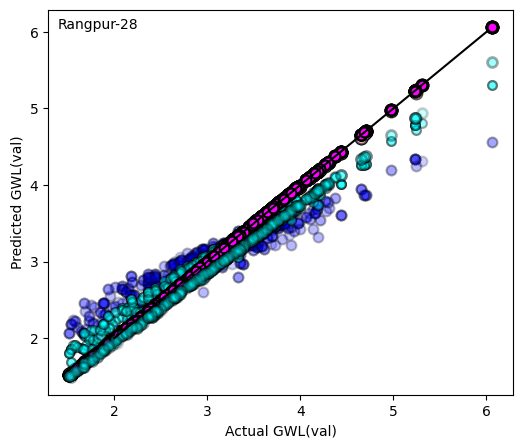

In [63]:
# Create a scatter plot
plt.figure(figsize=(6, 5))

plt.scatter(y_val, hybrid1_pred_val, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_val, hybrid2_pred_val, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_val, hybrid3_pred_val, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_val, hybrid4_pred_val, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_val,  hybrid5_pred_val, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_val, hybrid6_pred_val, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_val,  hybrid7_pred_val, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_val, hybrid8_pred_val, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_val, hybrid9_pred_val, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_val, hybrid10_pred_val, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')

plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(val)')
plt.ylabel('Predicted GWL(val)')
plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)

plt.show()

## Scatter plot: Test: Actual vs. Predicted

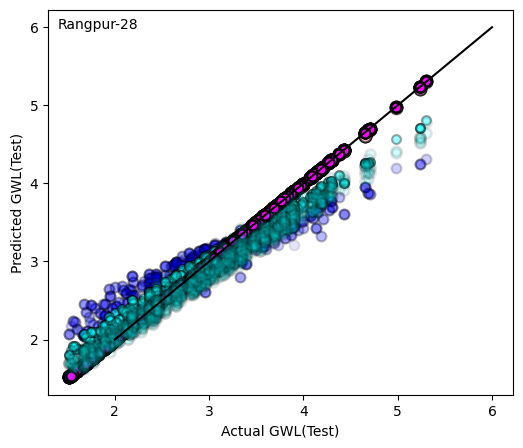

In [64]:
# Create a scatter plot
plt.figure(figsize=(6, 5))

plt.scatter(y_test, hybrid1_pred_test, color='red', edgecolors='black', s=40, linewidths=1.5, label='Hybrid Model 1')
plt.scatter(y_test, hybrid2_pred_test, color='green', edgecolors='red', s=70, linewidths=1.5, alpha=0.2, label='Hybrid Model 2')
plt.scatter(y_test, hybrid3_pred_test, color='blue', edgecolors='black', s=50, linewidths=1.5,alpha=0.1, label='Hybrid Model 3')
plt.scatter(y_test, hybrid4_pred_test, color='orange', edgecolors='black', s=70, linewidths=1.5, label='Hybrid Model 4')
plt.scatter(y_test,  hybrid5_pred_test, color='purple', edgecolors='blue', s=50, linewidths=1.5, label='Hybrid Model 5')
plt.scatter(y_test, hybrid6_pred_test, color='pink', edgecolors='black', s=70, linewidths=1.5,alpha=0.3, label='Hybrid Model 6')
plt.scatter(y_test,  hybrid7_pred_test, color='purple', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 7')
plt.scatter(y_test, hybrid8_pred_test, color='cyan', edgecolors='black', s=40, linewidths=1.5,alpha=0.2, label='Hybrid Model 8')
plt.scatter(y_test, hybrid9_pred_test, color='#FF00FF', edgecolors='black', s=50, linewidths=1.5, label='Hybrid Model 9')
plt.scatter(y_test, hybrid10_pred_test, color='#00FFFF', edgecolors='black', s=50, linewidths=2,alpha=0.1 ,label='Hybrid Model 10')

plt.plot([2, 6], [2, 6], color='black')
plt.xlabel('Actual GWL(Test)')
plt.ylabel('Predicted GWL(Test)')
plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.grid(False)
plt.show()

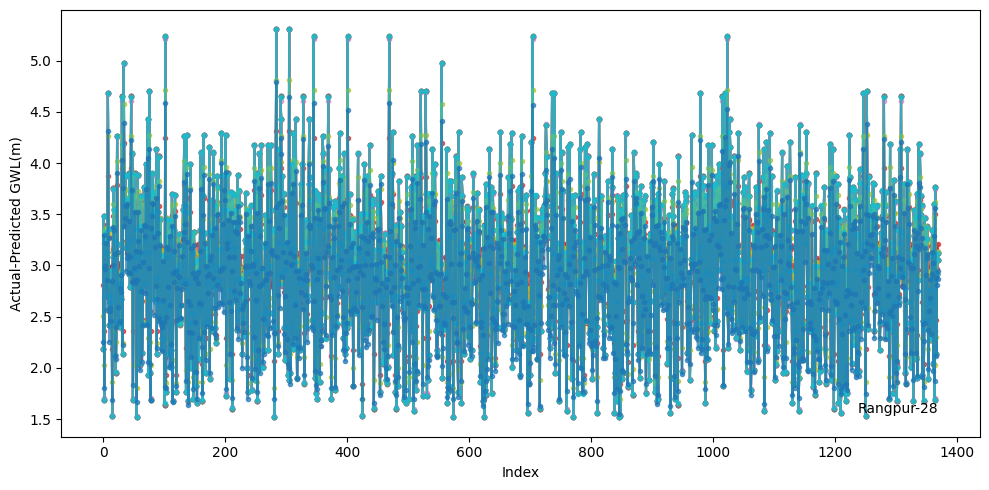

In [65]:
# Define the models and their corresponding predictions
models_predictions = {
    'Hybrid Model 1': hybrid1_pred_test,
    'Hybrid Model 2': hybrid2_pred_test,
    'Hybrid Model 3': hybrid3_pred_test,
    'Hybrid Model 4': hybrid4_pred_test,
    'Hybrid Model 5': hybrid5_pred_test,
    'Hybrid Model 6': hybrid6_pred_test,
    'Hybrid Model 7': hybrid7_pred_test,
    'Hybrid Model 8': hybrid8_pred_test,
    'Hybrid Model 9': hybrid9_pred_test,
    'Hybrid Model 10': hybrid10_pred_test
}

# Create a DataFrame for the actual values (y_test)
actual_values = pd.DataFrame({'Actual Values': y_test.values})

# Create a plot with adjusted figure size and margins
plt.figure(figsize=(10, 5))

# Plot the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=3)

# Plot the predicted values for each model
for model_name, predictions in models_predictions.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=3, alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')

# Add text "Rangpur-28" at the bottom right corner with slight adjustment upwards
plt.text(actual_values.index.max(), plt.ylim()[0] + 0.2, "Rangpur-28", va='bottom', ha='right', fontsize=10)

plt.grid(False)

# Manually adjust the margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.tight_layout()
plt.show()


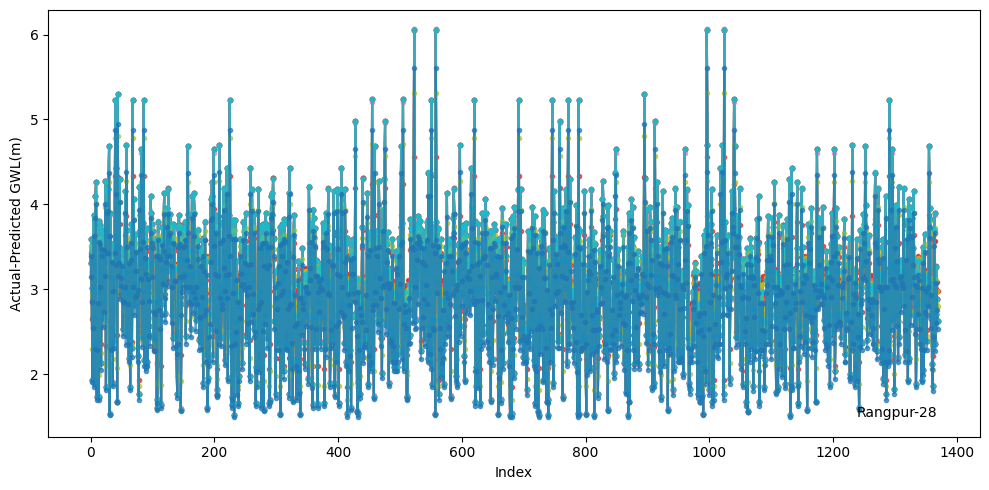

In [66]:
# Define the models and their corresponding predictions
models_predictions_val = {
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val,
    'Hybrid Model 7': hybrid7_pred_val,
    'Hybrid Model 8': hybrid8_pred_val,
    'Hybrid Model 9': hybrid9_pred_val,
    'Hybrid Model 10': hybrid10_pred_val
}

# Create a DataFrame for the actual values (y_val)
actual_values = pd.DataFrame({'Actual Values': y_val.values})

# Create a plot
plt.figure(figsize=(10, 5))

# Plot the actual values
plt.plot(actual_values.index, actual_values['Actual Values'], label='Actual Values', linestyle='-', marker='o', markersize=3)

# Plot the predicted values for each model
for model_name, predictions in models_predictions_val.items():
    plt.plot(actual_values.index, predictions, label=model_name, linestyle='-', marker='o', markersize=3, alpha=0.7)

plt.xlabel('Index')
plt.ylabel('Actual-Predicted GWL(m)')
plt.grid(False)
plt.text(actual_values.index.max(), plt.ylim()[0] + 0.2, "Rangpur-28", va='bottom', ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Validation stage: Distribution and Time series analysis

In [67]:
# Assuming 'Date' is a column in your original DataFrame 'df'
dates_val = df.loc[y_val.index, 'Date']

# Assuming 'hybrid1_pred_val' to 'hybrid10_pred_val' are your predicted values for 10 models
hybrid_val_data = {'Actual Values': y_val.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_val,
                    'Hybrid Model 2 Predictions': hybrid2_pred_val,
                    'Hybrid Model 3 Predictions': hybrid3_pred_val,
                    'Hybrid Model 4 Predictions': hybrid4_pred_val,
                    'Hybrid Model 5 Predictions': hybrid5_pred_val,
                    'Hybrid Model 6 Predictions': hybrid6_pred_val,
                    'Hybrid Model 7 Predictions': hybrid7_pred_val,
                    'Hybrid Model 8 Predictions': hybrid8_pred_val,
                    'Hybrid Model 9 Predictions': hybrid9_pred_val,
                    'Hybrid Model 10 Predictions': hybrid10_pred_val,
                    'Date': dates_val}

hybrid_val_df = pd.DataFrame(hybrid_val_data)

print("\nValidation Set:")
hybrid_val_df


Validation Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
7609,3.310000,3.310000,3.305872,3.317580,3.307523,3.307327,3.297502,3.310000,3.302412,3.309671,3.142443,2013-11-01
4084,3.587500,3.587500,3.586585,3.423476,3.586951,3.587038,3.587099,3.587500,3.504840,3.588573,3.391565,2004-03-08
7920,3.012500,3.012500,3.012032,2.857314,3.012219,3.012099,3.013012,3.012500,2.934990,3.015828,2.846368,2014-09-08
8327,1.933333,1.933333,1.933958,2.646644,1.933708,1.933676,1.935098,1.933333,2.291569,1.933233,1.908305,2015-10-20
2716,2.675000,2.675000,2.675811,2.705271,2.675487,2.675552,2.674179,2.675000,2.689933,2.672265,2.544232,2000-06-09
...,...,...,...,...,...,...,...,...,...,...,...,...
5762,2.358000,2.358000,2.359405,2.637726,2.358843,2.359038,2.375227,2.358000,2.511561,2.357902,2.270942,2008-10-11
3254,2.705000,2.705000,2.704705,2.996940,2.704823,2.704661,2.710467,2.705000,2.854816,2.706339,2.599794,2001-11-29
4541,3.267500,3.267500,3.266205,2.967808,3.266723,3.266666,3.257421,3.267500,3.109469,3.264439,3.072164,2005-06-08
350,2.882000,2.882000,2.880473,3.088121,2.881084,2.881070,2.875755,2.882000,2.979680,2.882166,2.757334,1993-12-17


In [68]:
# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Print the sorted DataFrame
hybrid_val_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.820905,1993-01-09
1,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.820905,1993-01-15
2,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.820905,1993-01-18
3,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.820905,1993-01-20
4,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.820905,1993-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1.752000,1.752000,1.754100,2.436613,1.753260,1.753376,1.759606,1.752000,2.101043,1.748101,1.734331,2017-11-10
1366,2.003333,2.003333,2.002327,2.671198,2.002730,2.002605,2.006735,2.003333,2.339271,2.003671,1.970294,2017-12-17
1367,2.003333,2.003333,2.002327,2.671198,2.002730,2.002605,2.006735,2.003333,2.339271,2.003671,1.970294,2017-12-21
1368,2.003333,2.003333,2.002327,2.671198,2.002730,2.002605,2.006735,2.003333,2.339271,2.003671,1.970294,2017-12-23


# Violin Plot: Distribution of Predicted vs Actual Values (Test Stage)

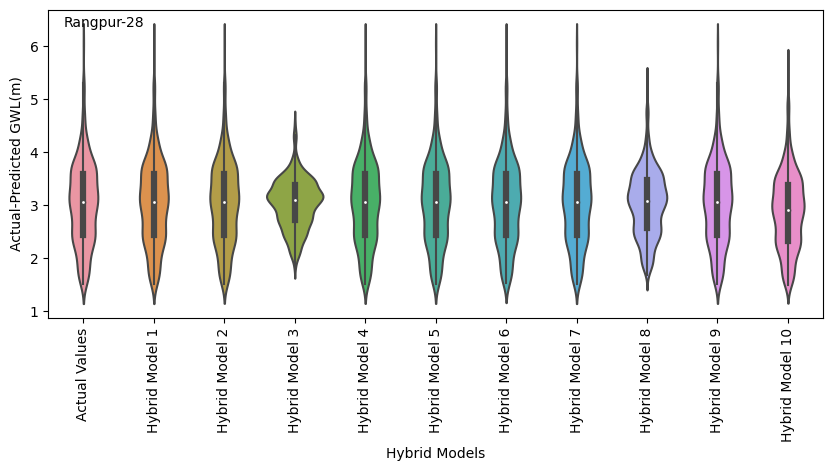

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hybrid1_pred_val' to 'hybrid10_pred_val' are your predicted values for 10 models

# Combine the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual Values': y_val.values,
    'Hybrid Model 1': hybrid1_pred_val,
    'Hybrid Model 2': hybrid2_pred_val,
    'Hybrid Model 3': hybrid3_pred_val,
    'Hybrid Model 4': hybrid4_pred_val,
    'Hybrid Model 5': hybrid5_pred_val,
    'Hybrid Model 6': hybrid6_pred_val,
    'Hybrid Model 7': hybrid7_pred_val,
    'Hybrid Model 8': hybrid8_pred_val,
    'Hybrid Model 9': hybrid9_pred_val,
    'Hybrid Model 10': hybrid10_pred_val,
})

# Create a violin plot
plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.xlabel('Hybrid Models')
plt.ylabel('Actual-Predicted GWL(m)')
# Rotate x-axis ticks by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [70]:
# Print the sorted DataFrame
hybrid_val_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,2.956,2.956,2.956,2.956,2.956,2.833333,2.833333,2.833333,2.833333,2.833333,...,2.122,2.122,2.122,1.752,1.752,1.752,2.003333,2.003333,2.003333,2.003333
Hybrid Model 1 Predictions,2.956,2.956,2.956,2.956,2.956,2.833333,2.833333,2.833333,2.833333,2.833333,...,2.122,2.122,2.122,1.752,1.752,1.752,2.003333,2.003333,2.003333,2.003333
Hybrid Model 2 Predictions,2.956273,2.956273,2.956273,2.956273,2.956273,2.833164,2.833164,2.833164,2.833164,2.833164,...,2.122828,2.122828,2.122828,1.7541,1.7541,1.7541,2.002327,2.002327,2.002327,2.002327
Hybrid Model 3 Predictions,3.080683,3.080683,3.080683,3.080683,3.080683,3.07028,3.07028,3.07028,3.07028,3.07028,...,2.601046,2.601046,2.601046,2.436613,2.436613,2.436613,2.671198,2.671198,2.671198,2.671198
Hybrid Model 4 Predictions,2.956164,2.956164,2.956164,2.956164,2.956164,2.833231,2.833231,2.833231,2.833231,2.833231,...,2.122497,2.122497,2.122497,1.75326,1.75326,1.75326,2.00273,2.00273,2.00273,2.00273
Hybrid Model 5 Predictions,2.956152,2.956152,2.956152,2.956152,2.956152,2.833135,2.833135,2.833135,2.833135,2.833135,...,2.122631,2.122631,2.122631,1.753376,1.753376,1.753376,2.002605,2.002605,2.002605,2.002605
Hybrid Model 6 Predictions,2.95732,2.95732,2.95732,2.95732,2.95732,2.834491,2.834491,2.834491,2.834491,2.834491,...,2.117744,2.117744,2.117744,1.759606,1.759606,1.759606,2.006735,2.006735,2.006735,2.006735
Hybrid Model 7 Predictions,2.956,2.956,2.956,2.956,2.956,2.833333,2.833333,2.833333,2.833333,2.833333,...,2.122,2.122,2.122,1.752,1.752,1.752,2.003333,2.003333,2.003333,2.003333
Hybrid Model 8 Predictions,3.019446,3.019446,3.019446,3.019446,3.019446,2.952525,2.952525,2.952525,2.952525,2.952525,...,2.358804,2.358804,2.358804,2.101043,2.101043,2.101043,2.339271,2.339271,2.339271,2.339271
Hybrid Model 9 Predictions,2.955739,2.955739,2.955739,2.955739,2.955739,2.83187,2.83187,2.83187,2.83187,2.83187,...,2.128739,2.128739,2.128739,1.748101,1.748101,1.748101,2.003671,2.003671,2.003671,2.003671


# Time series plots: Test stage

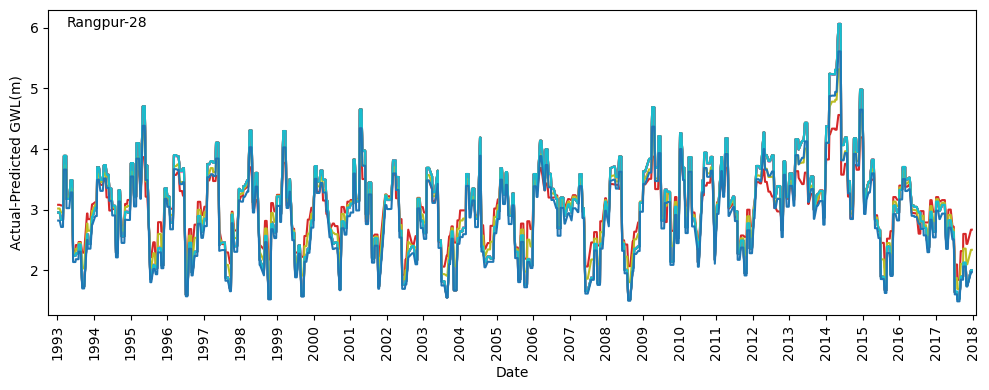

In [71]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data only from 1992 to 2018
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))


plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


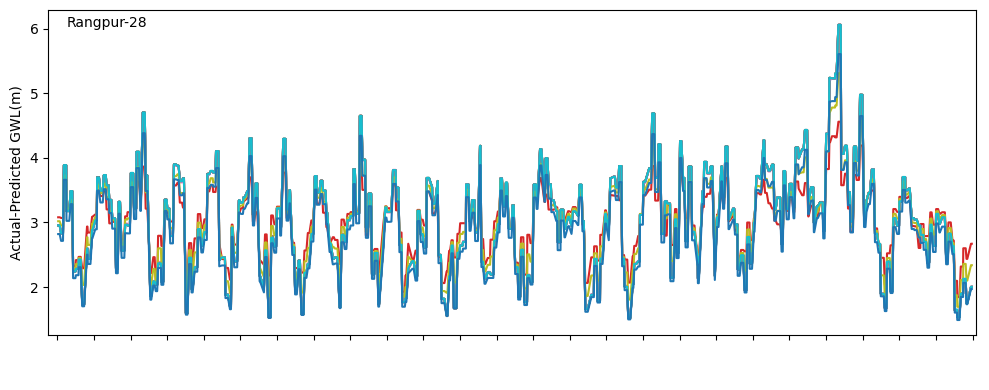

In [72]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime format
hybrid_val_df['Date'] = pd.to_datetime(hybrid_val_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_val_df = hybrid_val_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_val_df = hybrid_val_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 4))

# Iterate over the hybrid models and plot their predictions
for col in hybrid_val_df.columns[:-1]:
    plt.plot(hybrid_val_df['Date'], hybrid_val_df[col], label=col)

# Add labels and title

plt.ylabel('Actual-Predicted GWL(m)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, color='white')  # Set xticks color to white

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data only from 1992 to 2018
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))


plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


# Test stage: Distribution and Time series analysis

In [73]:
# Assuming 'Date' is a column in your original DataFrame 'df'
dates_test = df.loc[y_test.index, 'Date']

# Assuming 'hybrid1_pred_test' to 'hybrid10_pred_test' are your predicted values for 10 models
hybrid_test_data = {'Actual Values': y_test.values,
                    'Hybrid Model 1 Predictions': hybrid1_pred_test,
                    'Hybrid Model 2 Predictions': hybrid2_pred_test,
                    'Hybrid Model 3 Predictions': hybrid3_pred_test,
                    'Hybrid Model 4 Predictions': hybrid4_pred_test,
                    'Hybrid Model 5 Predictions': hybrid5_pred_test,
                    'Hybrid Model 6 Predictions': hybrid6_pred_test,
                    'Hybrid Model 7 Predictions': hybrid7_pred_test,
                    'Hybrid Model 8 Predictions': hybrid8_pred_test,
                    'Hybrid Model 9 Predictions': hybrid9_pred_test,
                    'Hybrid Model 10 Predictions': hybrid10_pred_test,
                    'Date': dates_test}

hybrid_test_df = pd.DataFrame(hybrid_test_data)

print("\nTest Set:")
hybrid_test_df


Test Set:


,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
4710,2.182000,2.182000,2.186444,2.810013,2.184667,2.184938,2.192751,2.182000,2.506273,2.184296,2.250866,2005-11-24
131,3.486000,3.486000,3.484326,3.223436,3.484996,3.485058,3.479769,3.486000,3.349338,3.486116,3.294438,1993-05-12
2802,1.690000,1.690000,1.691674,2.357192,1.691004,1.690926,1.701951,1.690000,2.033254,1.688172,1.806680,2000-09-03
4472,3.252000,3.252000,3.251265,3.298619,3.251559,3.251493,3.247398,3.252000,3.271477,3.252182,2.961447,2005-03-31
1108,3.215000,3.215000,3.214862,3.147185,3.214917,3.214911,3.217619,3.215000,3.182990,3.215221,2.993834,1996-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...
2948,3.102000,3.102000,3.103093,3.159654,3.102656,3.102541,3.105351,3.102000,3.133746,3.102173,2.878983,2001-01-27
6394,2.133333,2.133333,2.133558,2.471682,2.133468,2.133493,2.132819,2.133333,2.302242,2.136921,2.117572,2010-07-05
1746,2.918333,2.918333,2.917933,2.966796,2.918093,2.918173,2.917987,2.918333,2.942185,2.920196,2.812120,1997-10-13
5820,3.120000,3.120000,3.121987,3.129803,3.121192,3.121225,3.129433,3.120000,3.132895,3.119413,2.942848,2008-12-08


In [74]:
# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)
hybrid_test_df

,Actual Values,Hybrid Model 1 Predictions,Hybrid Model 2 Predictions,Hybrid Model 3 Predictions,Hybrid Model 4 Predictions,Hybrid Model 5 Predictions,Hybrid Model 6 Predictions,Hybrid Model 7 Predictions,Hybrid Model 8 Predictions,Hybrid Model 9 Predictions,Hybrid Model 10 Predictions,Date
0,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.737505,1993-01-01
1,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.702105,1993-01-04
2,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.812555,1993-01-13
3,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,2.845105,1993-01-27
4,2.956000,2.956000,2.956273,3.080683,2.956164,2.956152,2.957320,2.956000,3.019446,2.955739,3.049305,1993-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...
1365,1.752000,1.752000,1.754100,2.436613,1.753260,1.753376,1.759606,1.752000,2.101043,1.748101,1.850964,2017-11-30
1366,2.003333,2.003333,2.002327,2.671198,2.002730,2.002605,2.006735,2.003333,2.339271,2.003671,2.104961,2017-12-07
1367,2.003333,2.003333,2.002327,2.671198,2.002730,2.002605,2.006735,2.003333,2.339271,2.003671,2.034461,2017-12-10
1368,2.003333,2.003333,2.002327,2.671198,2.002730,2.002605,2.006735,2.003333,2.339271,2.003671,1.952561,2017-12-28


# Violin Plot: Distribution of Predicted vs Actual Values (Test Stage)

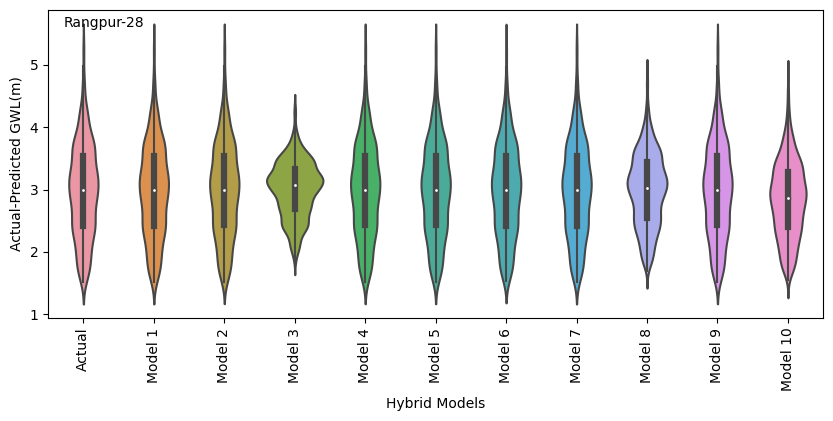

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hybrid1_pred_test' to 'hybrid10_pred_test' are your predicted values for 10 models

# Combine the predicted values into a single DataFrame
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Model 1': hybrid1_pred_test,
    'Model 2': hybrid2_pred_test,
    'Model 3': hybrid3_pred_test,
    'Model 4': hybrid4_pred_test,
    'Model 5': hybrid5_pred_test,
    'Model 6': hybrid6_pred_test,
    'Model 7': hybrid7_pred_test,
    'Model 8': hybrid8_pred_test,
    'Model 9': hybrid9_pred_test,
    'Model 10': hybrid10_pred_test,
})

# Create a violin plot
plt.figure(figsize=(10, 4))
ax = sns.violinplot(data=predictions_df)
plt.xlabel('Hybrid Models')
plt.ylabel('Actual-Predicted GWL(m)')
plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Rotate x-axis ticks by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [76]:
# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Print the sorted DataFrame
hybrid_test_df.T

,0,1,2,3,4,5,6,7,8,9,...,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369
Actual Values,2.956,2.956,2.956,2.956,2.956,2.833333,2.833333,2.833333,2.833333,2.833333,...,1.752,1.752,1.752,1.752,1.752,1.752,2.003333,2.003333,2.003333,2.003333
Hybrid Model 1 Predictions,2.956,2.956,2.956,2.956,2.956,2.833333,2.833333,2.833333,2.833333,2.833333,...,1.752,1.752,1.752,1.752,1.752,1.752,2.003333,2.003333,2.003333,2.003333
Hybrid Model 2 Predictions,2.956273,2.956273,2.956273,2.956273,2.956273,2.833164,2.833164,2.833164,2.833164,2.833164,...,1.7541,1.7541,1.7541,1.7541,1.7541,1.7541,2.002327,2.002327,2.002327,2.002327
Hybrid Model 3 Predictions,3.080683,3.080683,3.080683,3.080683,3.080683,3.07028,3.07028,3.07028,3.07028,3.07028,...,2.436613,2.436613,2.436613,2.436613,2.436613,2.436613,2.671198,2.671198,2.671198,2.671198
Hybrid Model 4 Predictions,2.956164,2.956164,2.956164,2.956164,2.956164,2.833231,2.833231,2.833231,2.833231,2.833231,...,1.75326,1.75326,1.75326,1.75326,1.75326,1.75326,2.00273,2.00273,2.00273,2.00273
Hybrid Model 5 Predictions,2.956152,2.956152,2.956152,2.956152,2.956152,2.833135,2.833135,2.833135,2.833135,2.833135,...,1.753376,1.753376,1.753376,1.753376,1.753376,1.753376,2.002605,2.002605,2.002605,2.002605
Hybrid Model 6 Predictions,2.95732,2.95732,2.95732,2.95732,2.95732,2.834491,2.834491,2.834491,2.834491,2.834491,...,1.759606,1.759606,1.759606,1.759606,1.759606,1.759606,2.006735,2.006735,2.006735,2.006735
Hybrid Model 7 Predictions,2.956,2.956,2.956,2.956,2.956,2.833333,2.833333,2.833333,2.833333,2.833333,...,1.752,1.752,1.752,1.752,1.752,1.752,2.003333,2.003333,2.003333,2.003333
Hybrid Model 8 Predictions,3.019446,3.019446,3.019446,3.019446,3.019446,2.952525,2.952525,2.952525,2.952525,2.952525,...,2.101043,2.101043,2.101043,2.101043,2.101043,2.101043,2.339271,2.339271,2.339271,2.339271
Hybrid Model 9 Predictions,2.955739,2.955739,2.955739,2.955739,2.955739,2.83187,2.83187,2.83187,2.83187,2.83187,...,1.748101,1.748101,1.748101,1.748101,1.748101,1.748101,2.003671,2.003671,2.003671,2.003671


# Time series plots: Test stage

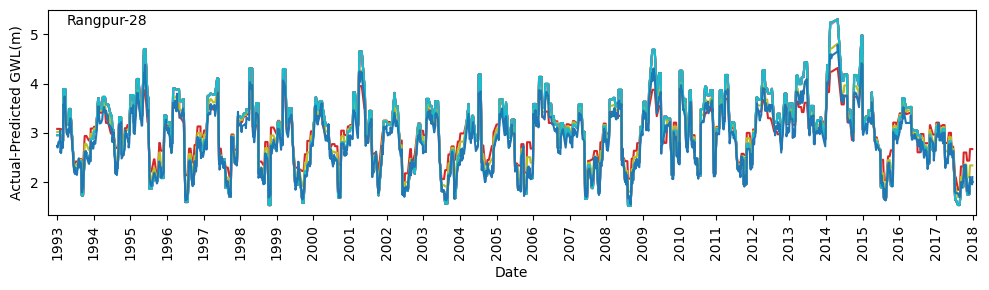

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'Date' column to datetime format
hybrid_test_df['Date'] = pd.to_datetime(hybrid_test_df['Date'], format='%d.%m.%Y')

# Sort the DataFrame by 'Date'
hybrid_test_df = hybrid_test_df.sort_values(by='Date')

# Reset the index after sorting
hybrid_test_df = hybrid_test_df.reset_index(drop=True)

# Create a time series plot
plt.figure(figsize=(10, 3))


# Iterate over the hybrid models and plot their predictions
for col in hybrid_test_df.columns[:-1]:
    plt.plot(hybrid_test_df['Date'], hybrid_test_df[col], label=col)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Actual-Predicted GWL(m)')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the date tick frequency to display every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Set the x-axis limits to show data only from 1992 to 2018
plt.xlim(pd.Timestamp('1992-10-01'), pd.Timestamp('2018-01-31'))

plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()

# Density Plot: Validation stage

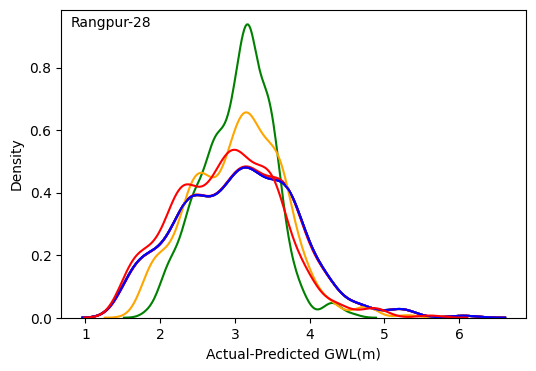

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a figure
plt.figure(figsize=(6, 4))

# Plotting density plots for each hybrid model
sns.kdeplot(hybrid1_pred_val, color='green', label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_val, color='blue', label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_val, color='green', label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_val, color='purple', label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_val, color='orange', label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_val, color='red', label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_val, color='purple', label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_val, color='orange', label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_val, color='blue', label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_val, color='red', label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()

# Density Plot: Test stage

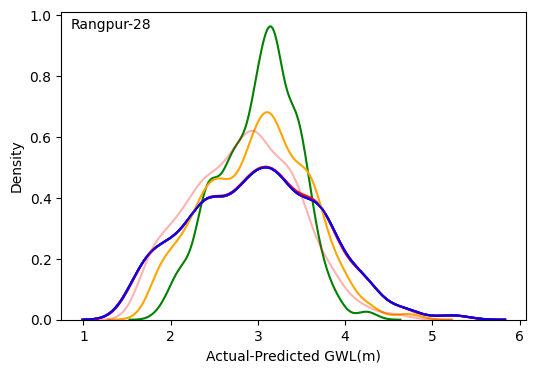

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a figure
plt.figure(figsize=(6, 4))

# Define a list of colors for the density plots
colors = ['green', 'blue', 'green', 'purple', 'orange', 'red', 'purple', 'orange', 'blue', "red"]

# Plotting density plots for each hybrid model with different colors
sns.kdeplot(hybrid1_pred_test, color=colors[0], label='Hybrid Model 1')
sns.kdeplot(hybrid2_pred_test, color=colors[1], alpha=0.3, label='Hybrid Model 2')
sns.kdeplot(hybrid3_pred_test, color=colors[2], label='Hybrid Model 3')
sns.kdeplot(hybrid4_pred_test, color=colors[3], label='Hybrid Model 4')
sns.kdeplot(hybrid5_pred_test, color=colors[4], label='Hybrid Model 5')
sns.kdeplot(hybrid6_pred_test, color=colors[5], label='Hybrid Model 6')
sns.kdeplot(hybrid7_pred_test, color=colors[6], label='Hybrid Model 7')
sns.kdeplot(hybrid8_pred_test, color=colors[7],label='Hybrid Model 8')
sns.kdeplot(hybrid9_pred_test, color=colors[8], label='Hybrid Model 9')
sns.kdeplot(hybrid10_pred_test, color=colors[9], alpha=0.3,label='Hybrid Model 10')

# Customize the plot
plt.xlabel('Actual-Predicted GWL(m)')
plt.ylabel('Density')
plt.grid(False)
plt.text(0.02, 0.98, "Rangpur-28", transform=plt.gca().transAxes, va='top', ha='left', fontsize=10)
plt.show()